# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Andrea Sala - Settembre 2020</span>
# <span style="color:darkgreen">  Esercitazione 11</span>

In questa esercitazione vengono presentate le reti neurali e la loro applicazione nell'eseguire **fit** di funzioni a una o più dimensioni. Ogni rete neurale costruita viene allenata su un set di dati $N_{train}$ (generato aggiungendo rumore gaussiano alle curve esatte) e successivamente validata su un set di dati $N_{valid}$. Per ogni casistica è stata costruita una rete differente (in base al numero di parametri liberi che il problema necessitava) ed è stata allenata variando opportunamente i suoi parametri. Ogni rete neurale è caratterizzata  ad esempio dal numero di layer, dalle funzioni di attivazione utilizzate e dall'ottimizzatore che si sceglie. Un buon indicatore di quanto una rete neurale impara a predire dei risultati dopo essere stata allenata è la *Mean Square Error* calcolata sul set di validazione: 
$$ MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2$$

Nel costruire reti neurali per eseguire fit, va ricordato che l'ultimo layer (ovvero il layer di output) deve essere costituito da un solo neurone, così come il layer di input) poichè si chiede alla rete di stimare un valore di y dato in ingresso un valore di x. In generale, per fittare una funzione $\Re^m \rightarrow \Re^n$ saranno necessari $m$ neuroni in input e $n$ in output.

In [271]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam, Ftrl

%config InlineBackend.figure_format = 'retina'

## Esercizio 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

Lo scopo di questo esercizio è migliorare la rete neurale formata da un singolo neurone che opera un fit lineare su dati geenrati aggiugendo rumore gaussiano ai dati esatti. Si è deciso di analizzare le prestazioni della rete variando tre parametri: il numro di epoche, il numero di dati di training della rete e la deviazione standard della gaussiana che genera il rumore.

Poiché ho tre parametri indipendenti, li vario in ordine iniziando con $\sigma$ perchè ritengo che sia il più determinante. Propongo quattro valori diversi di $\sigma$ mantenendo costanti gli altri due parametri:
- $\sigma=0.1$, $N_{epochs}=50$, $N_{train}=250$
- $\sigma=0.3$, $N_{epochs}=50$, $N_{train}=250$
- $\sigma=0.7$, $N_{epochs}=50$, $N_{train}=250$
- $\sigma=1.0$, $N_{epochs}=50$, $N_{train}=250$


In [272]:
def Try_LinFit_With_Params (sigma, Ntrain, Nepochs): 
    
    m = 2
    b = 1 
    
    fig, axs = plt.subplots(1,2, figsize=(14,5))
    plt.suptitle("Linear fit with $\sigma=$"+ str(sigma) + "  $N_{train}=$" + str(Ntrain) + "  $N_{epochs}=$" + str(Nepochs), fontsize=18)
    
    np.random.seed(0)
    Ntrain = (int)(Ntrain)
    x_train = np.random.uniform(-1, 1, Ntrain)
    Nvalid = (int)(Ntrain/10)
    x_valid = np.random.uniform(-1, 1, Nvalid)
    x_valid.sort()
    y_target = m * x_valid + b

    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)
    
    # plot training and target dataset
    axs[0].set_title('Target data VS Training data')
    axs[0].plot(x_valid, y_target, color='powderblue', label='Target')
    axs[0].scatter(x_train, y_train, color='firebrick', label='Training')
    axs[0].legend()
    axs[0].grid(True)
  
    
    # compose the NN model
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    ### model.summary()
    
    history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=Nepochs,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)
    
    ### model.get_weights()
   

    # look into training history
    # Plot training & validation loss values
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Test'], loc='best')
    plt.show()
    
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.title('Predicted dataset')
    plt.scatter(x_predicted, y_predicted,color='r')
    plt.plot(x_valid, y_target)
    plt.grid(True)
    plt.show()
    
     # evaluate model with validation set AND exact values
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    score2 = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    print()
    print('Model evaluated through validation set:', "           ", 'Model evaluated through exact curve:')
    print('Test loss:', score[0], "                       ", 'Test loss:', score2[0])
    print('Test accuracy:', score[1], "                   ", 'Test accuracy:', score2[1])
    

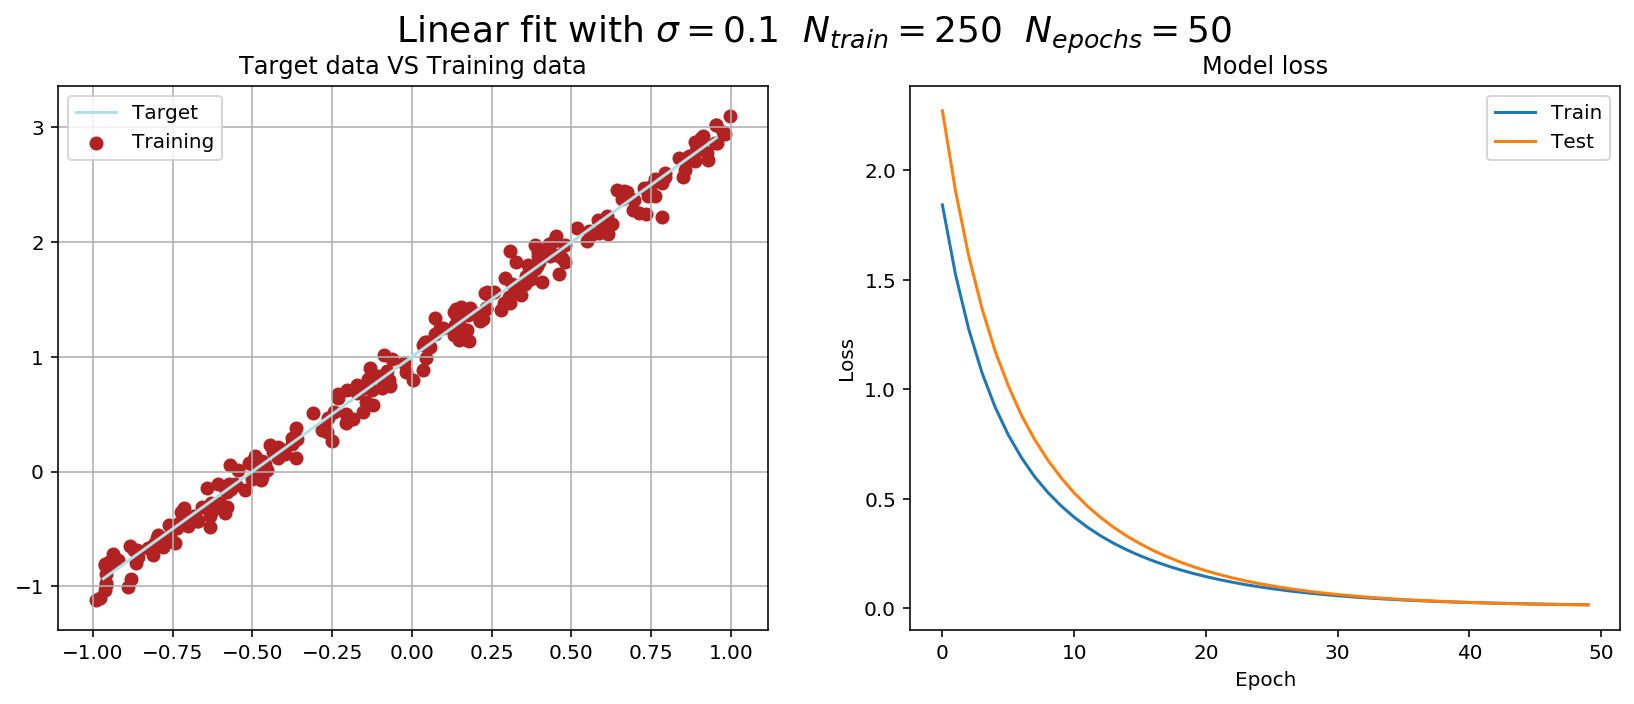

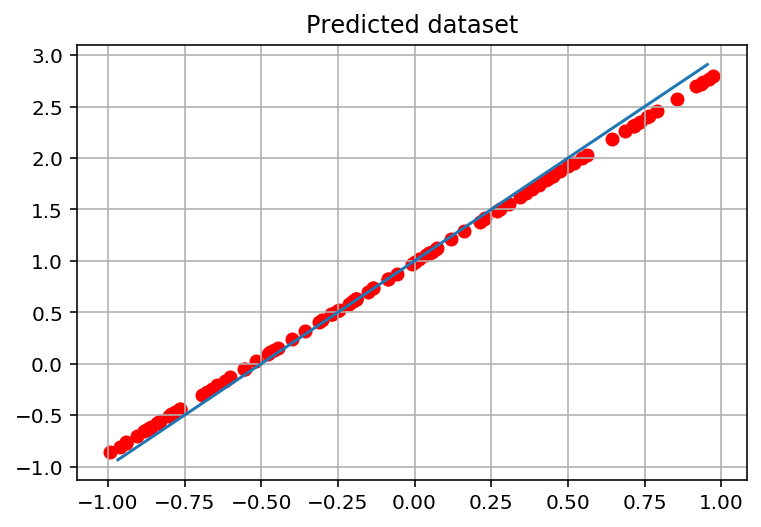


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.01639506220817566                         Test loss: 0.008554775267839432
Test accuracy: 0.01639506220817566                     Test accuracy: 0.008554775267839432


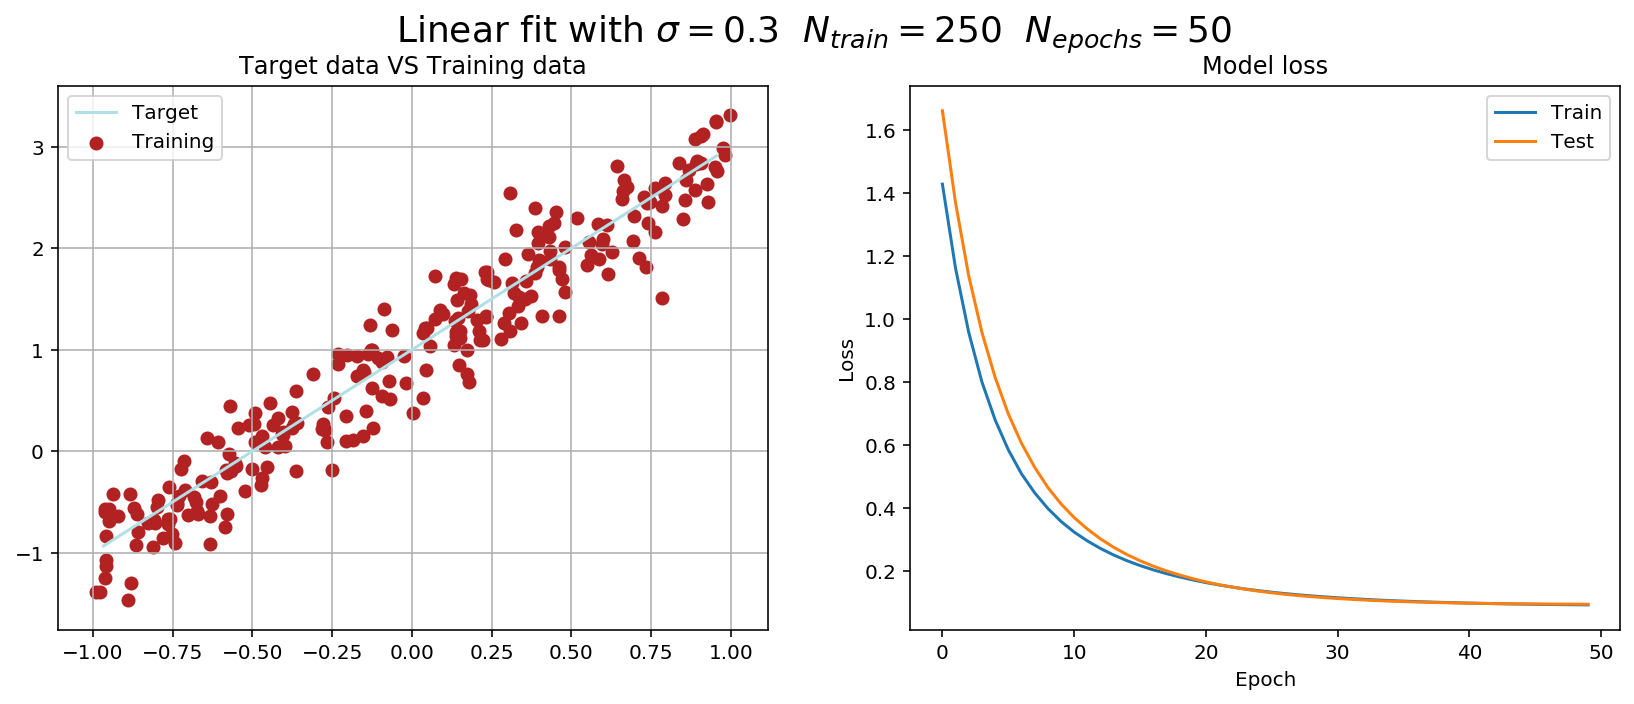

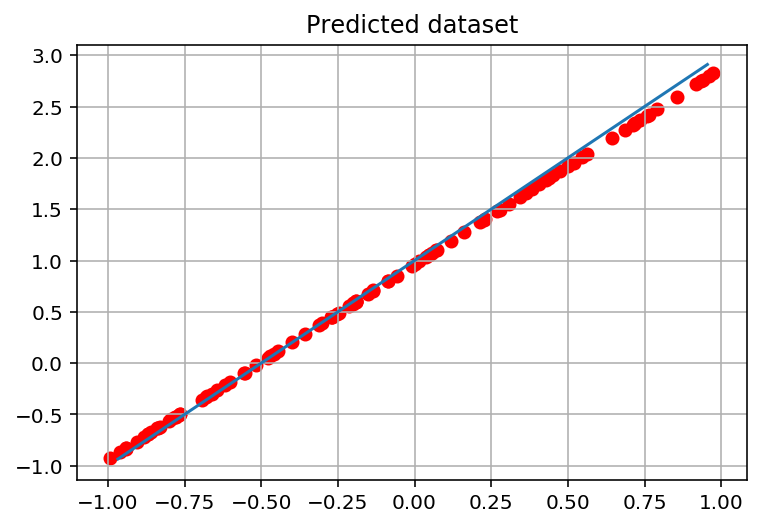


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.09552314132452011                         Test loss: 0.0053986357524991035
Test accuracy: 0.09552314132452011                     Test accuracy: 0.0053986357524991035


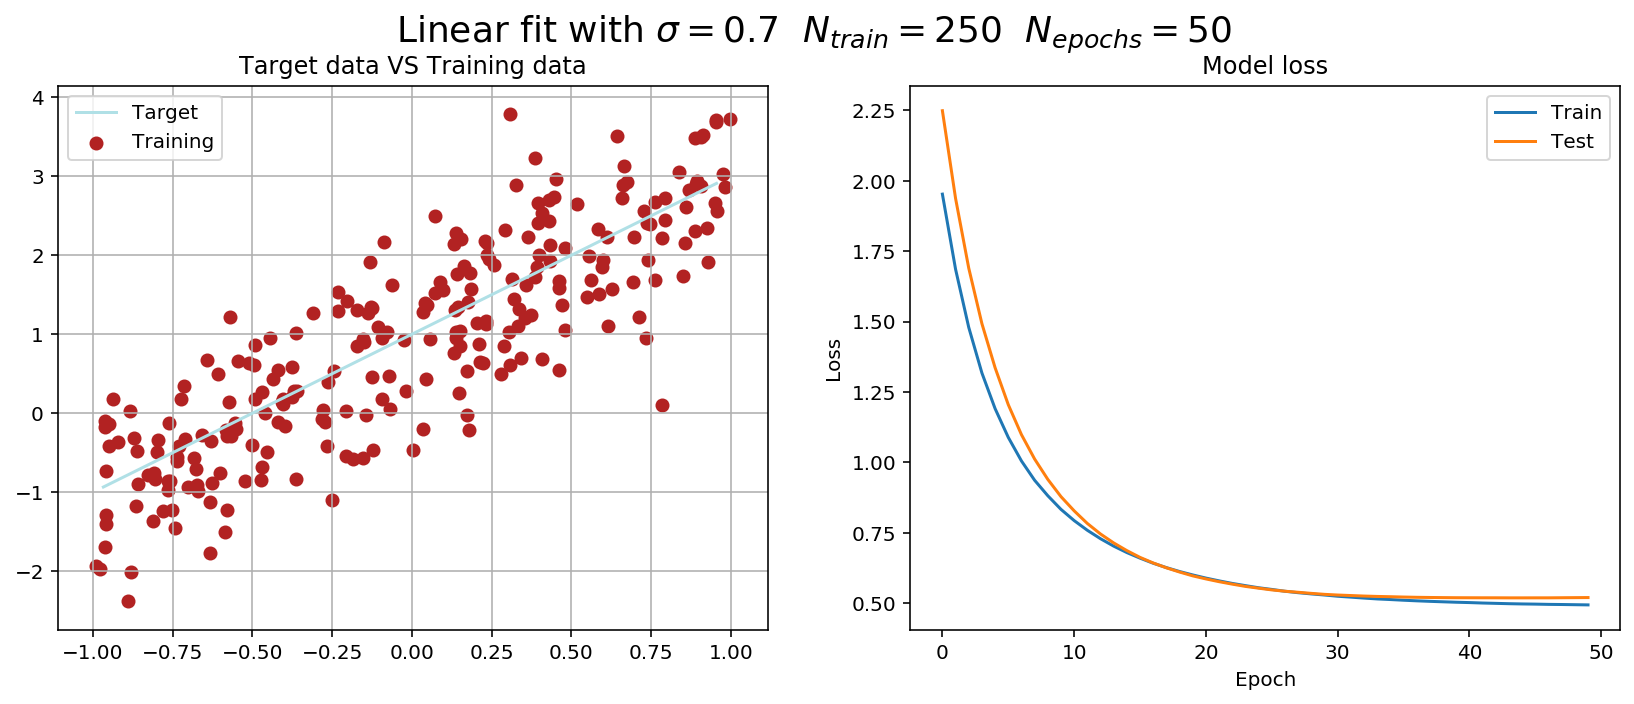

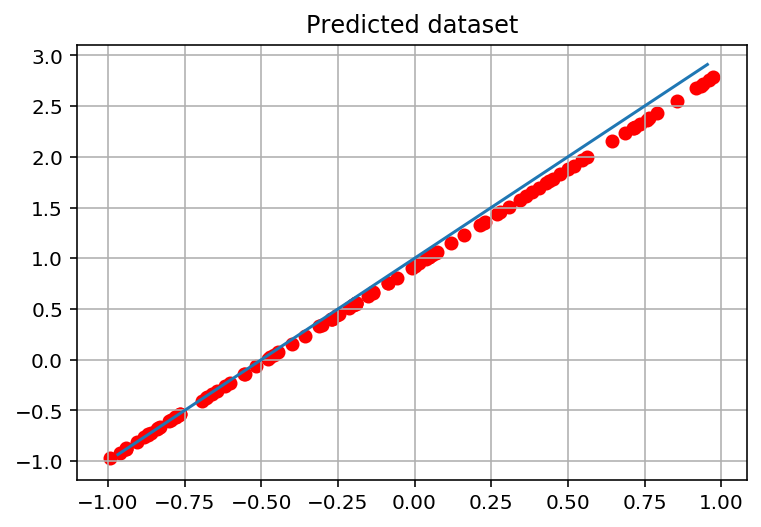


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.5192638635635376                         Test loss: 0.011079848743975163
Test accuracy: 0.5192638635635376                     Test accuracy: 0.011079848743975163


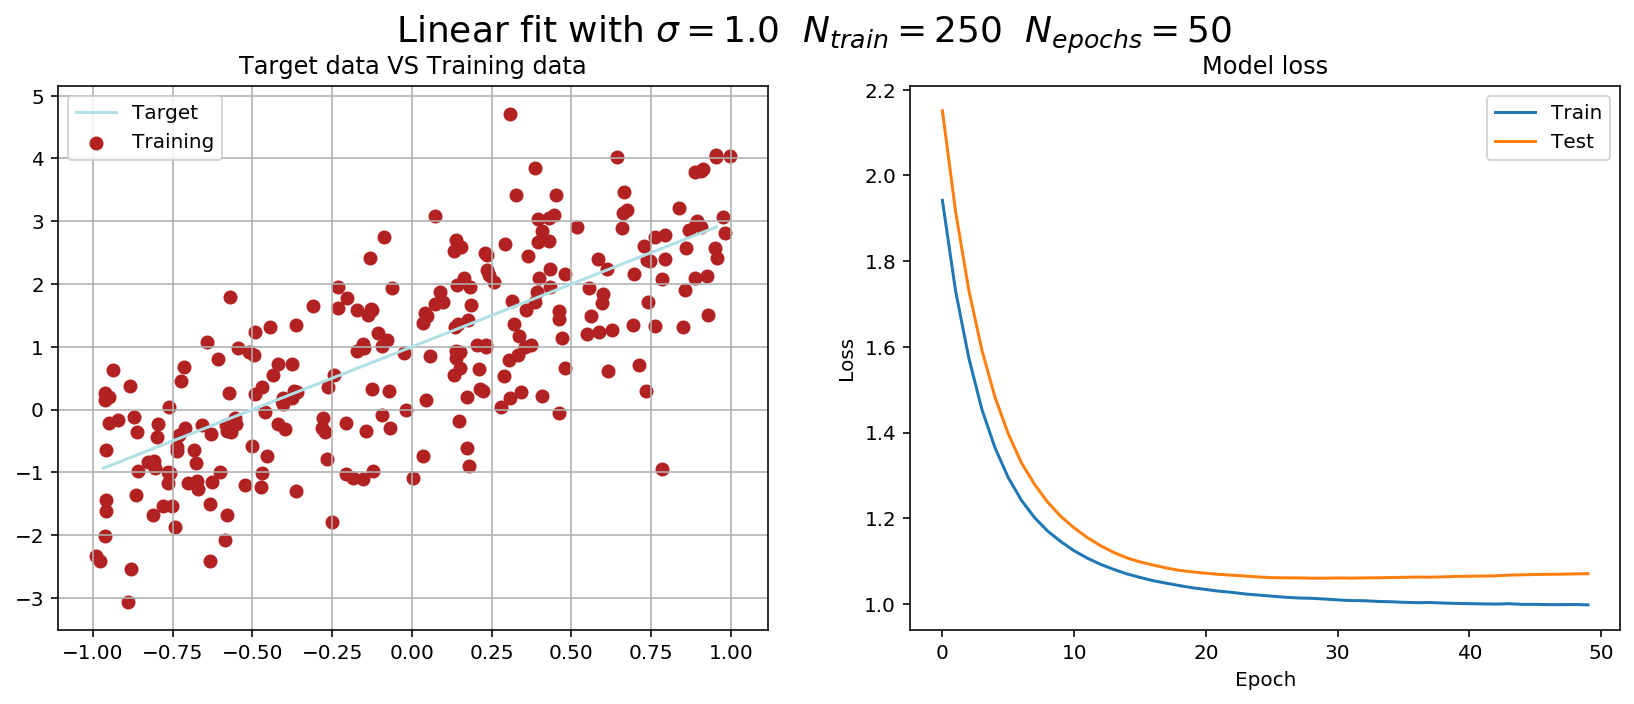

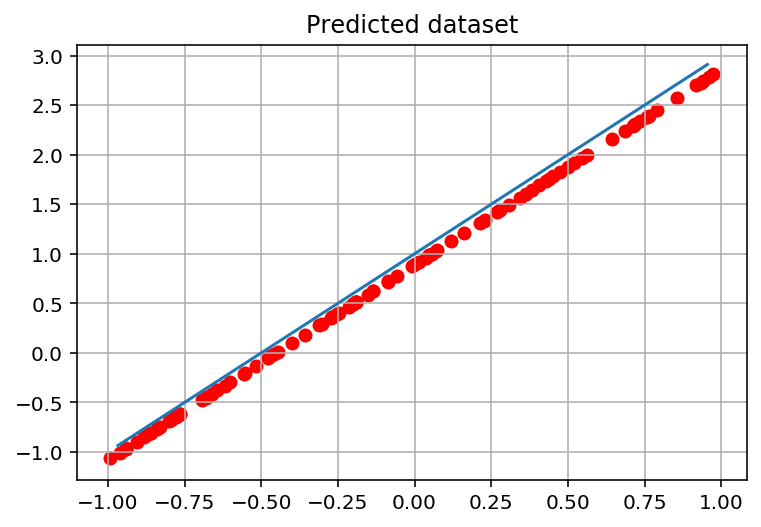


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 1.070666790008545                         Test loss: 0.013186078518629074
Test accuracy: 1.070666790008545                     Test accuracy: 0.013186078518629074


In [273]:
sigmas = np.array([0.1,0.3,0.7,1])
for sig in sigmas:
    Try_LinFit_With_Params(sig,250,50)

Il modello migliore è quello con $\sigma=0.1$, come potevamo aspettarci. Si tratta infatti del modello in cui i dati di training sono più vicini ai dati che vogliamo riprodurre. Si è provato poi a variare il numero di dati di training $N_{train}$, utilizzando $\sigma$ appena ottimizzato e mantenendo costante $N_{epochs}=50$.
- $\sigma=0.1$, $N_{epochs}=50$, $N_{train}=120$
- $\sigma=0.1$, $N_{epochs}=50$, $N_{train}=250$
- $\sigma=0.1$, $N_{epochs}=50$, $N_{train}=500$
- $\sigma=0.1$, $N_{epochs}=50$, $N_{train}=1000$



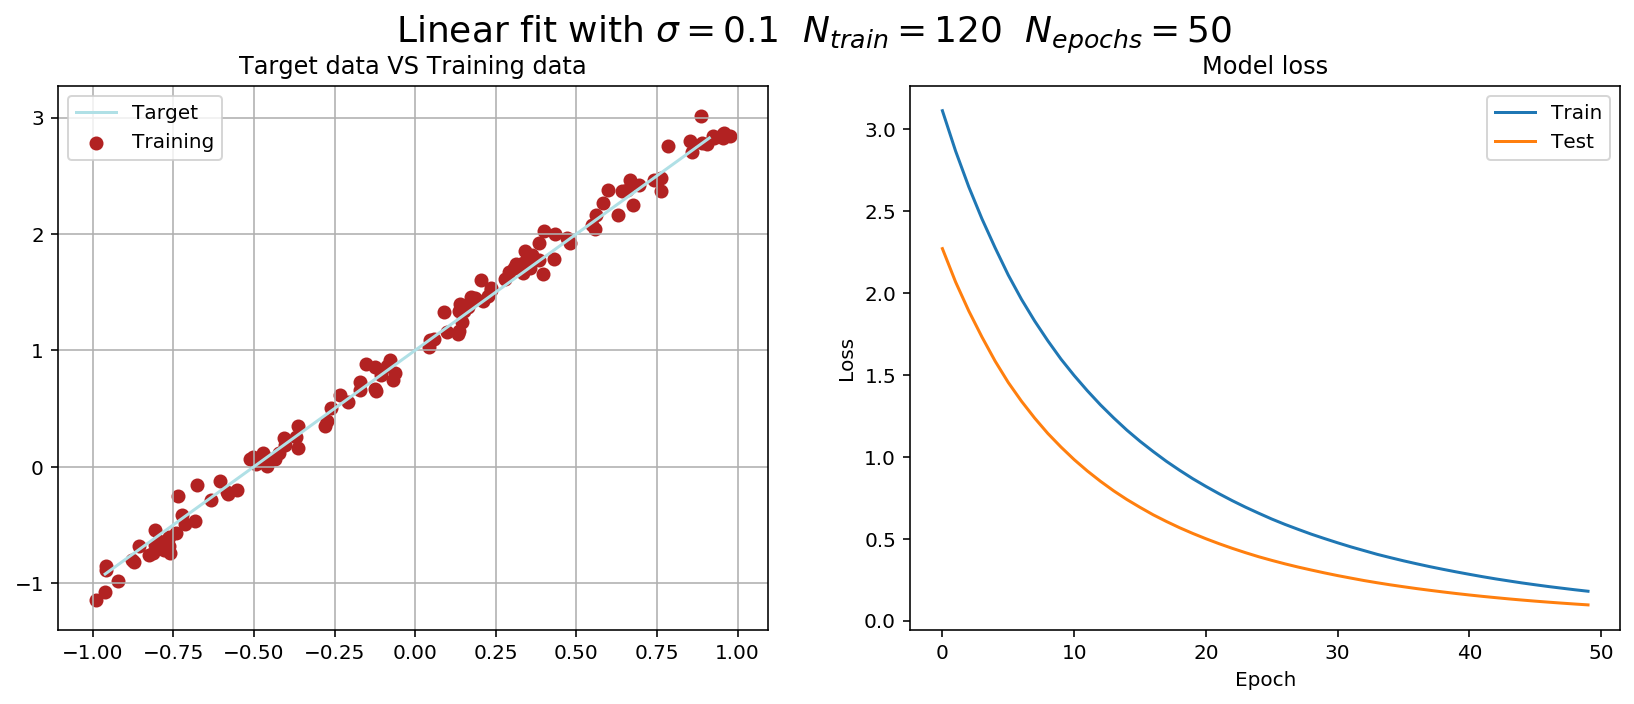

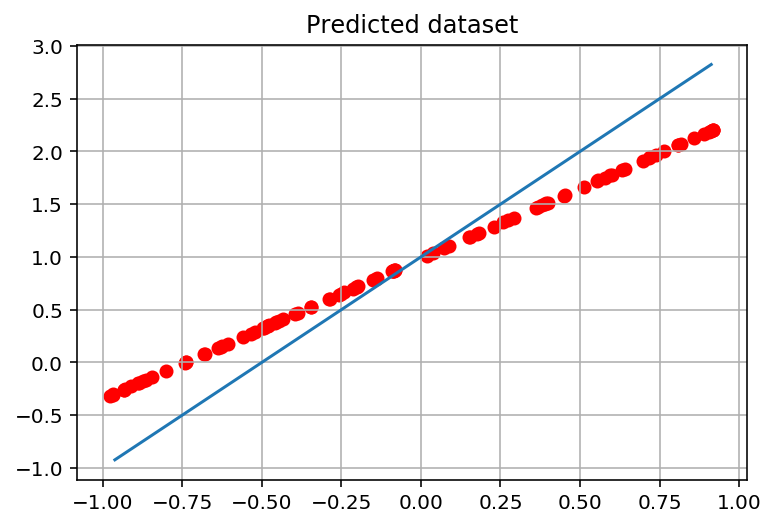


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.09580641984939575                         Test loss: 0.09913194924592972
Test accuracy: 0.09580641984939575                     Test accuracy: 0.09913194924592972


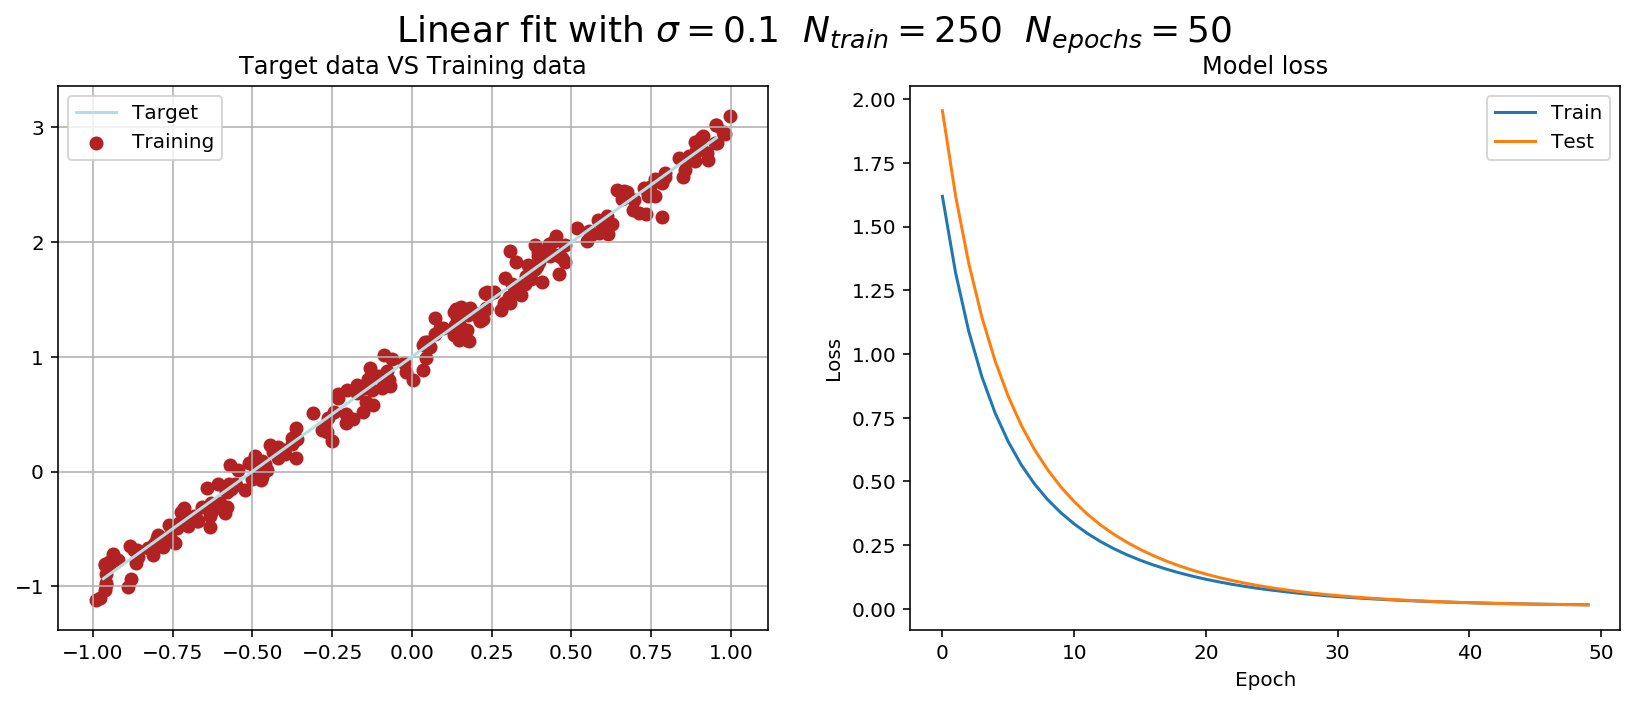

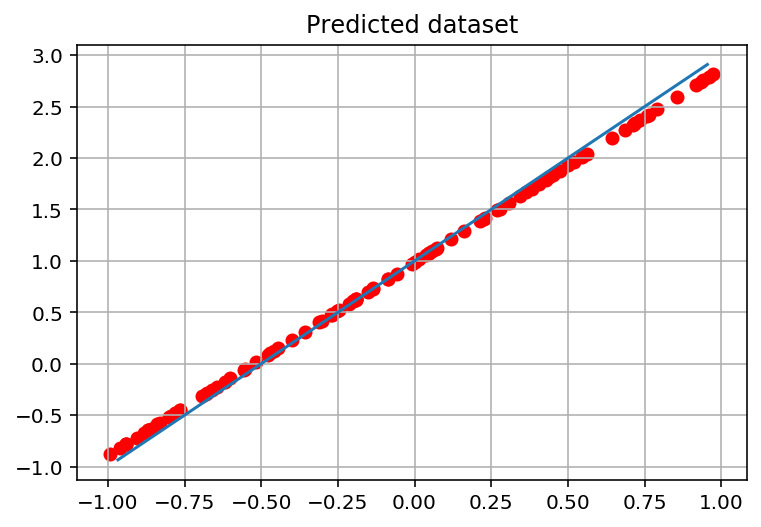


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.014862928539514542                         Test loss: 0.006677407771348953
Test accuracy: 0.014862928539514542                     Test accuracy: 0.006677407771348953


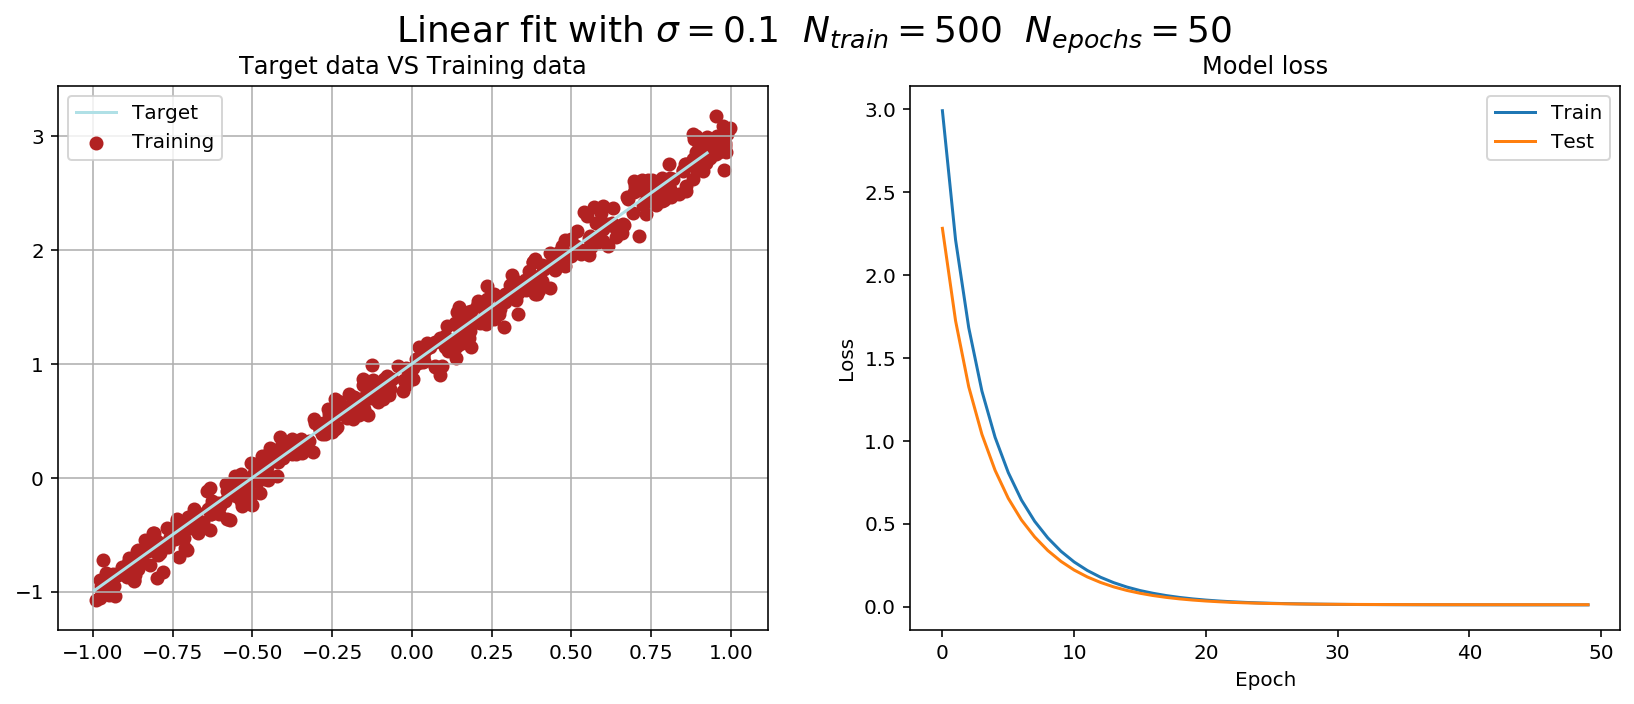

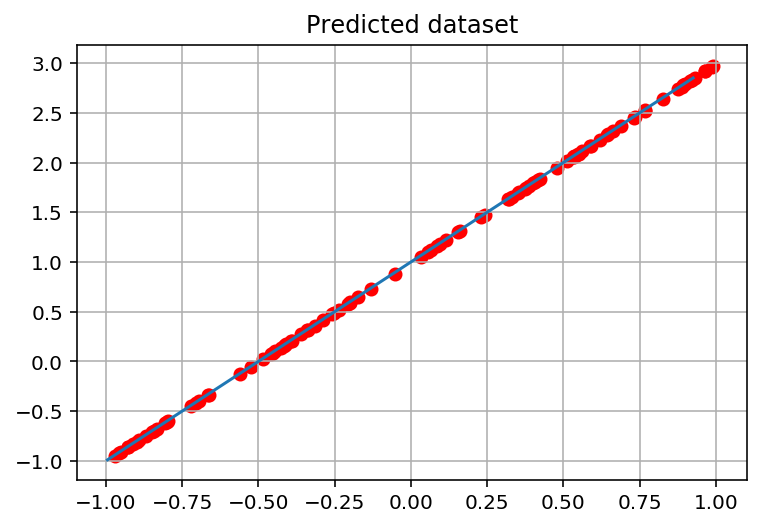


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.011073172092437744                         Test loss: 0.00010790413216454908
Test accuracy: 0.011073172092437744                     Test accuracy: 0.00010790413216454908


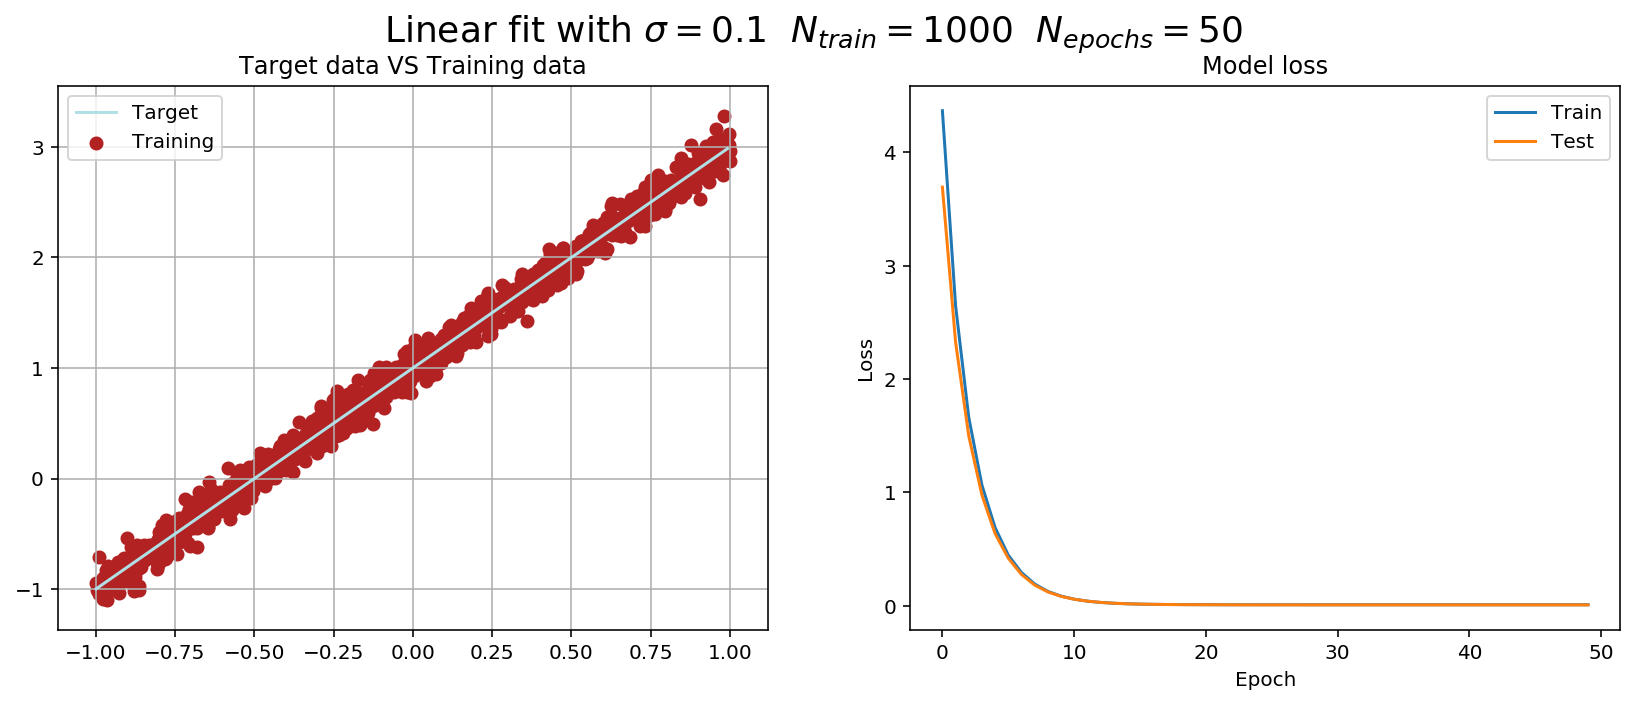

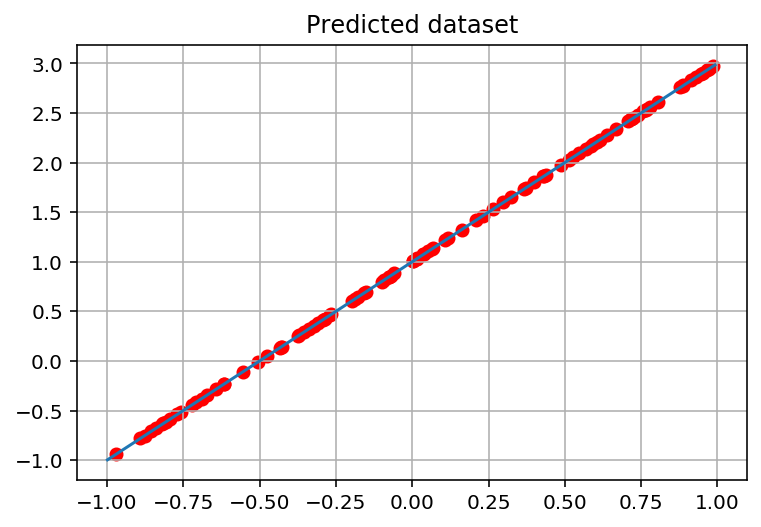


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.008217887952923775                         Test loss: 5.505697231455997e-07
Test accuracy: 0.008217887952923775                     Test accuracy: 5.505697231455997e-07


In [274]:
Ntrainz = np.array([120,250,500,1000])
for Ntr in Ntrainz:
    Try_LinFit_With_Params (0.1,Ntr,50)

Si osserva che aumentando $N_{train}$ la *loss* della rete diminusice, ovvero la rete riesce a generare dei dati più precisi. Va notato però che in corrispondenza dell'aumento del numero di dati di training si è aumentato porporzionalmente il numero dei dati di validazione in modo che il rapporto tra questi due numeri risultasse sempre uguale a 10. Una buona ripartizione dei dati tra training e validazione è fondamentale per evitare overfitting dei dati. <br/>
Da ultimo si è variato il numero di epoche, utilizzando i due altri parametri ottimizzati:
- $\sigma=0.1$, $N_{epochs}=5$, $N_{train}=1000$
- $\sigma=0.1$, $N_{epochs}=20$, $N_{train}=1000$
- $\sigma=0.1$, $N_{epochs}=50$, $N_{train}=1000$
- $\sigma=0.1$, $N_{epochs}=150$, $N_{train}=1000$




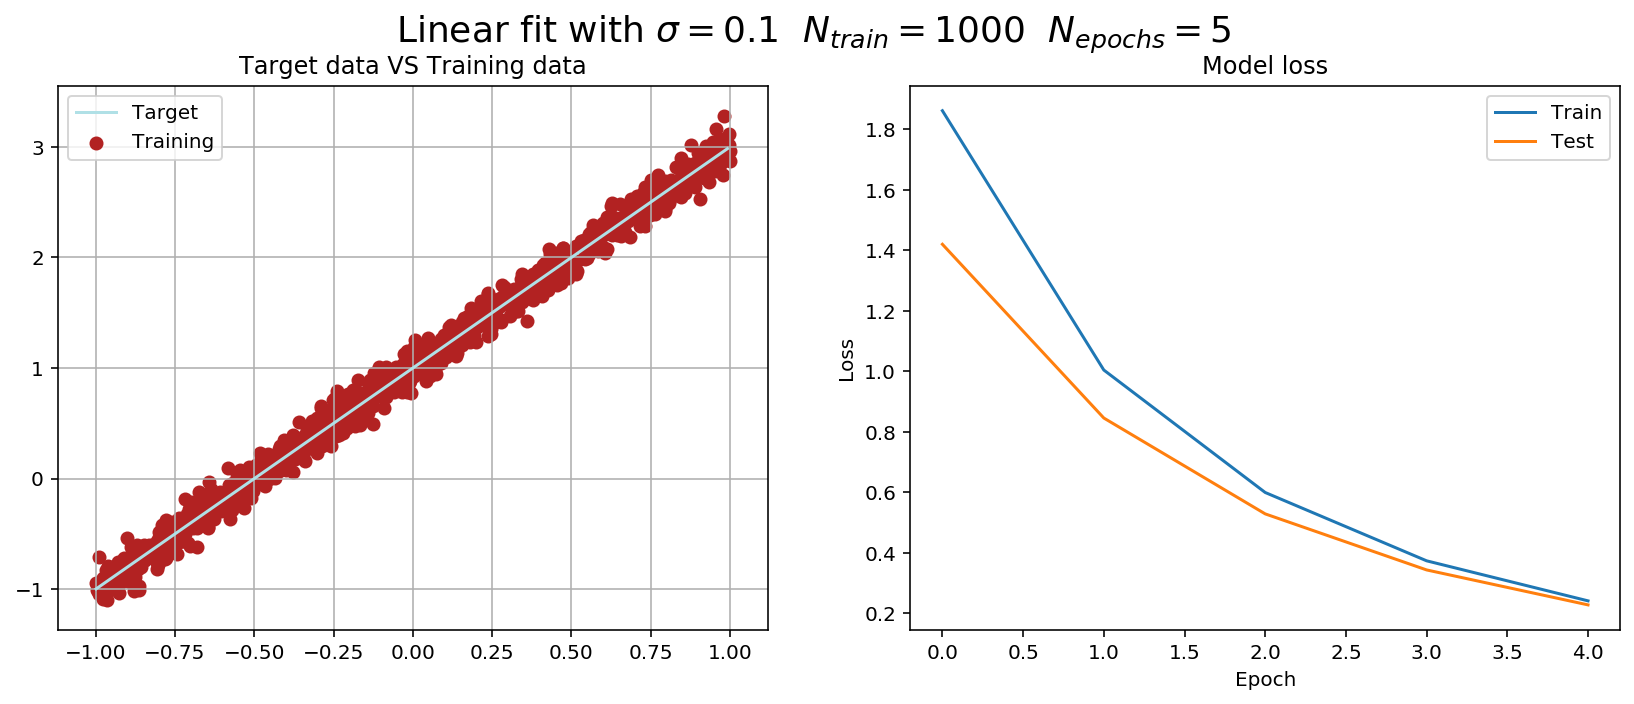

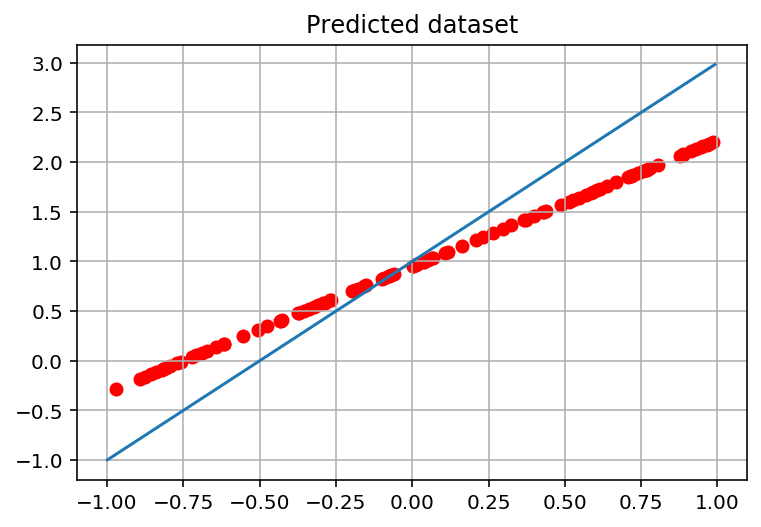


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.22833870351314545                         Test loss: 0.20765309035778046
Test accuracy: 0.22833870351314545                     Test accuracy: 0.20765309035778046


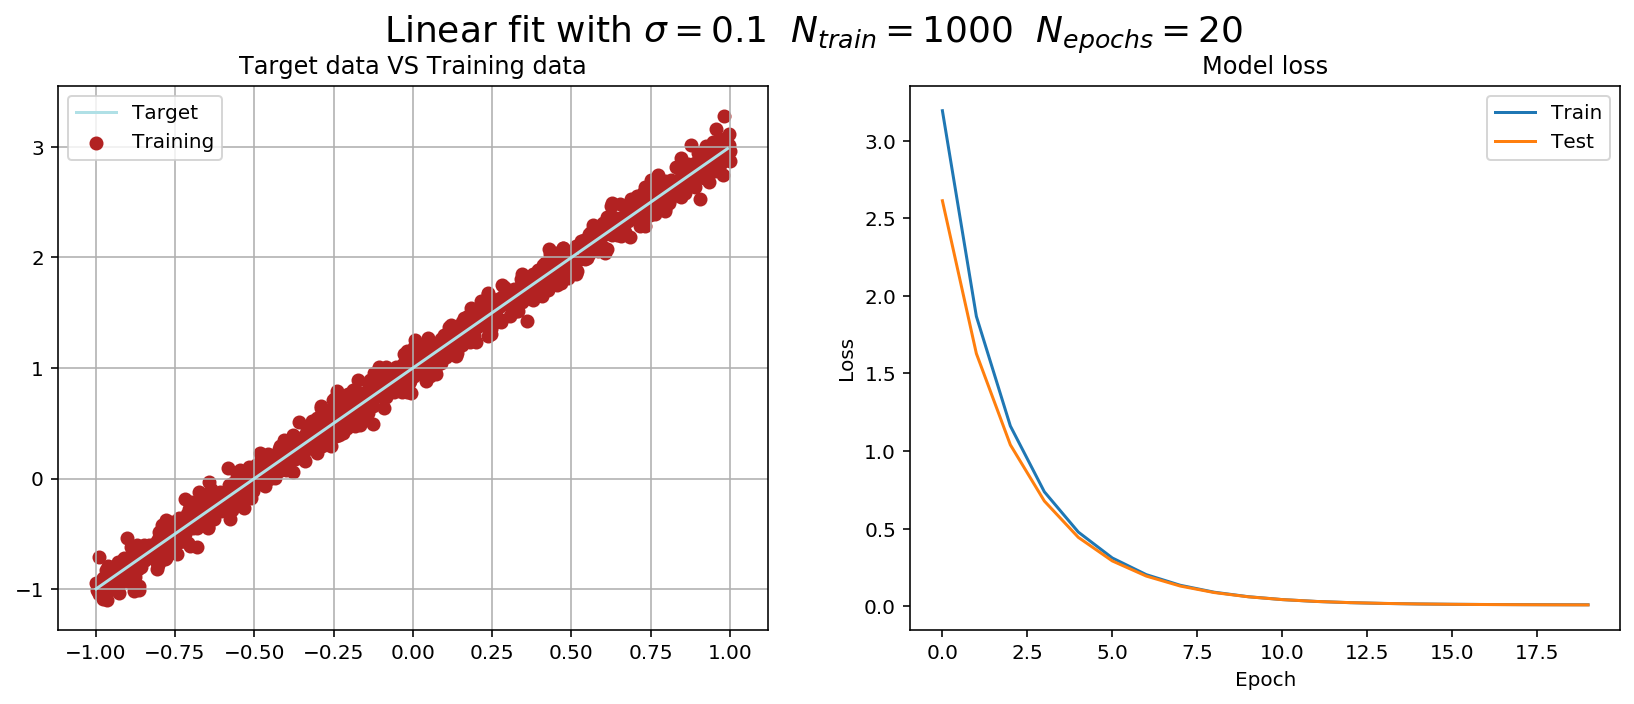

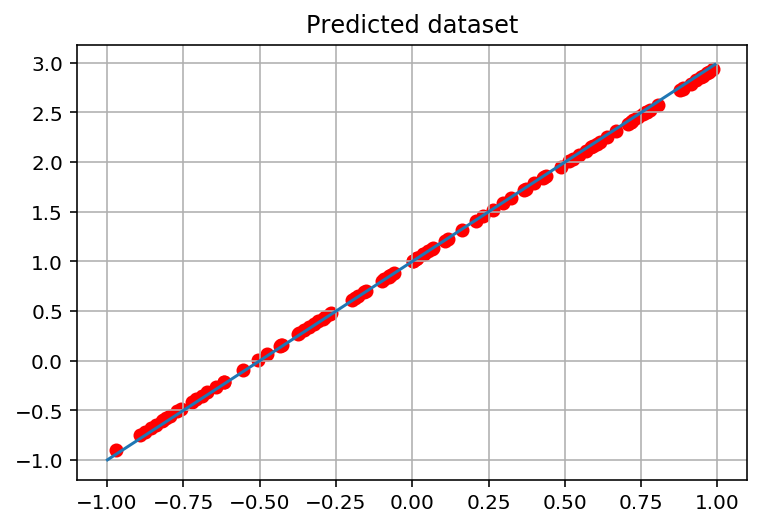


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.009494050405919552                         Test loss: 0.0006117315497249365
Test accuracy: 0.009494050405919552                     Test accuracy: 0.0006117315497249365


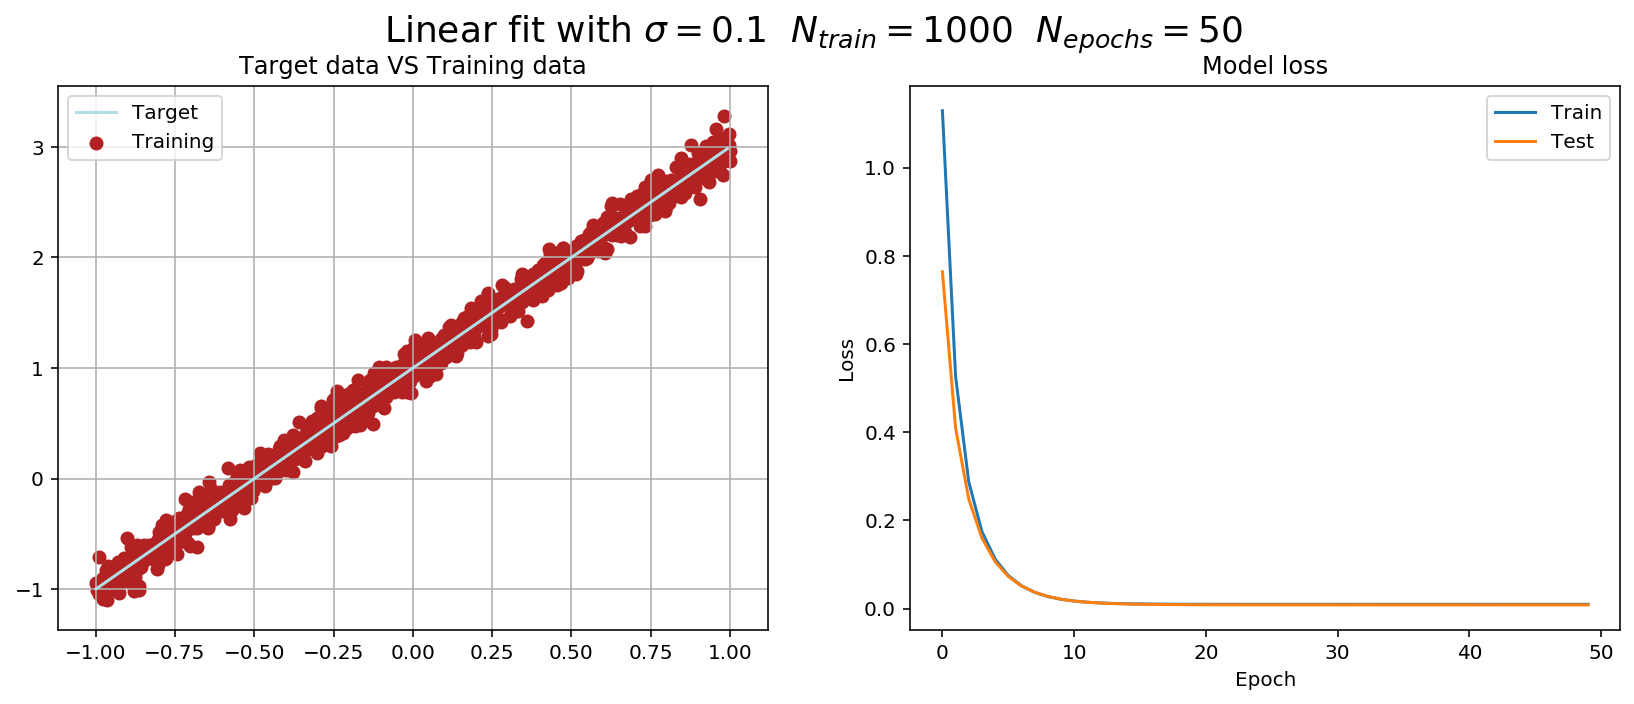

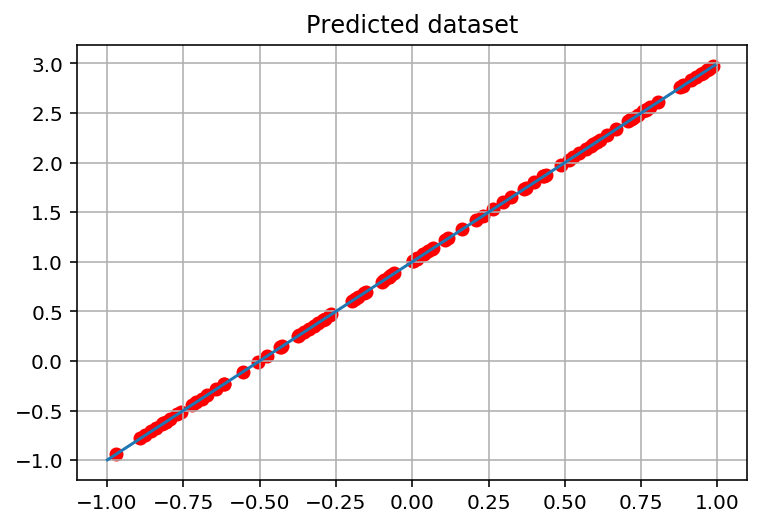


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.008218133822083473                         Test loss: 2.834987753885798e-06
Test accuracy: 0.008218133822083473                     Test accuracy: 2.834987753885798e-06


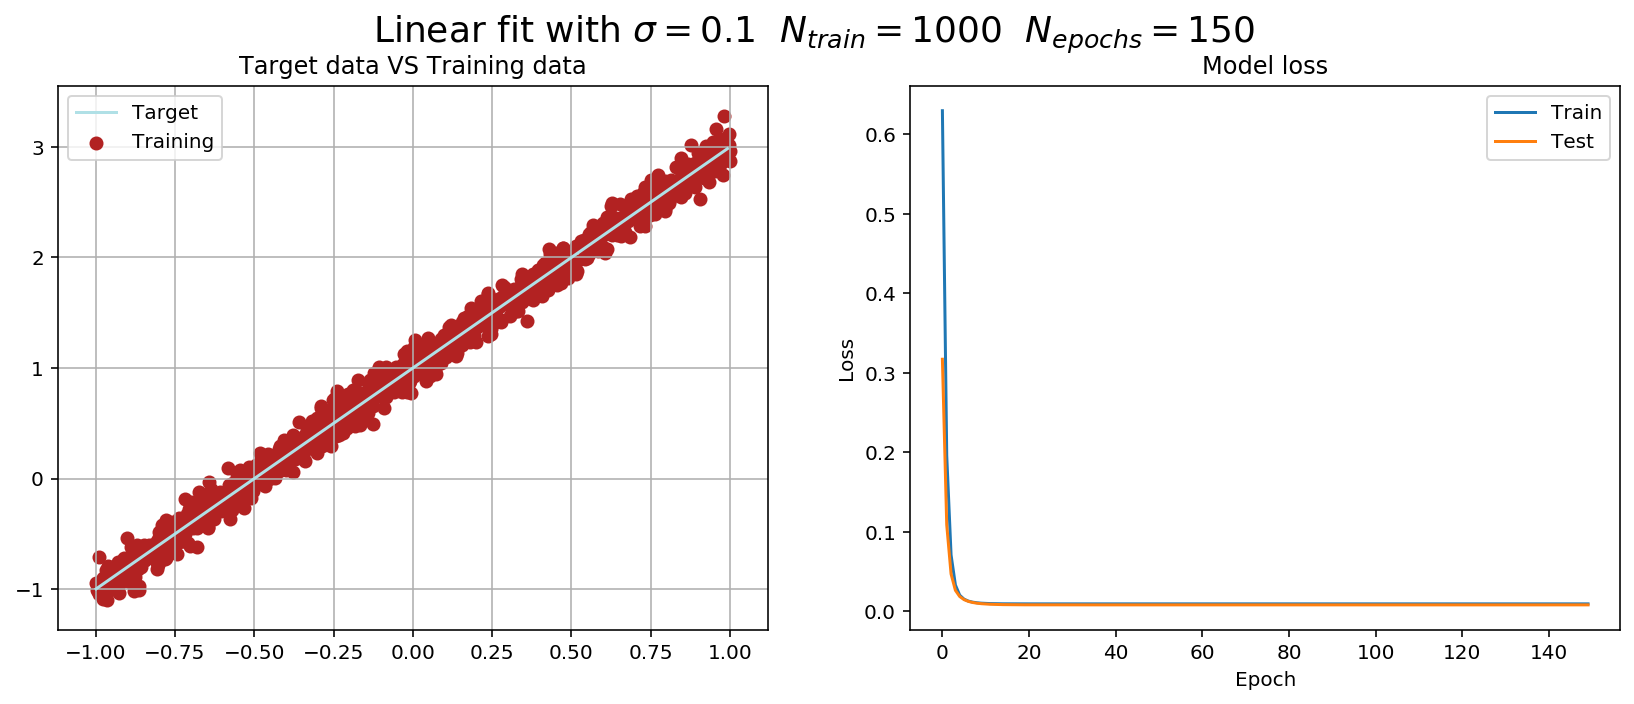

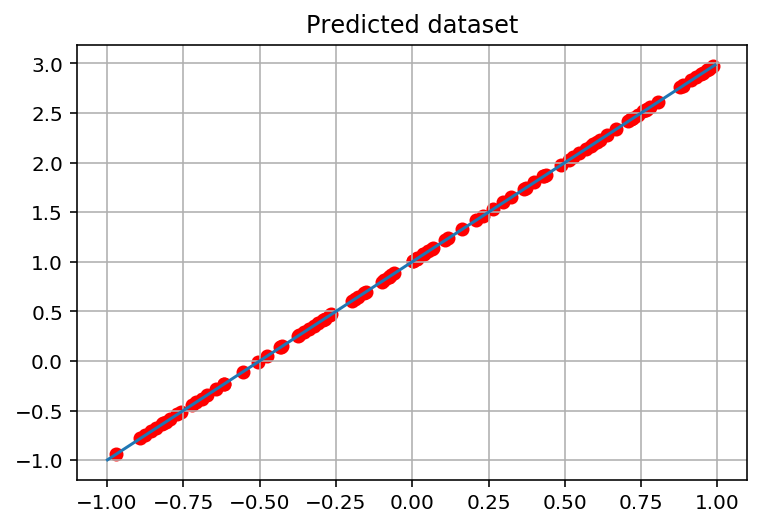


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.008217952214181423                         Test loss: 1.4721548495799652e-06
Test accuracy: 0.008217952214181423                     Test accuracy: 1.4721548495799652e-06


In [275]:
Nepo = np.array([5,20,50,150])
for ep in Nepo:
    Try_LinFit_With_Params (0.1,1000,ep)

Come si nota dai dati stampati alla fine di ogni run, l'errore commesso con il set di validation rimane pressochè costante negli ultimi tre casi. Anche dai grafici si nota che non si ha una significativa diminuzione dell'errore all'aumentare del numero di epoche. Per questa rete (o meglio, per questo neurone) dunque il numero ottimale di epoche è 20, perchè per valori più grandi si rischia di overfittare i dati di training.

## Esercizio 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit). How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

Come richiesto dal problema, ho implementato diversi tipi di rete neurale e ho osservato i risultati prodotti. Di seguito vengono presentati alcuni esempi significativi che ho scelto di riportare. <br/>
**Premessa importante**: La quantità di gradi di libertà che si presenta nella costruzione di una rete neurale è estremamente estesa. Anche solo cambiando l'ordine delle funzioni di attivazione dei vari layer, i risultati ottenuti cambiano radicalmente. Le possibili combinazioni di neuroni, anche in una rete con pochi layer, sono numerose. I miei tentativi di provare ad analizzare diversi tipi di reti sono quindi da considerarsi del tutto superficiali. <br/> Prima di costruire le reti, ho generato i dataset di traininge di validazione, ed ho fissato il numero di epoche e la quantità di rumore utilizzata per generare i dati.

In [276]:
def F_of(x):
    return (4 - 3*x -2*x**2 + 3*x**3)

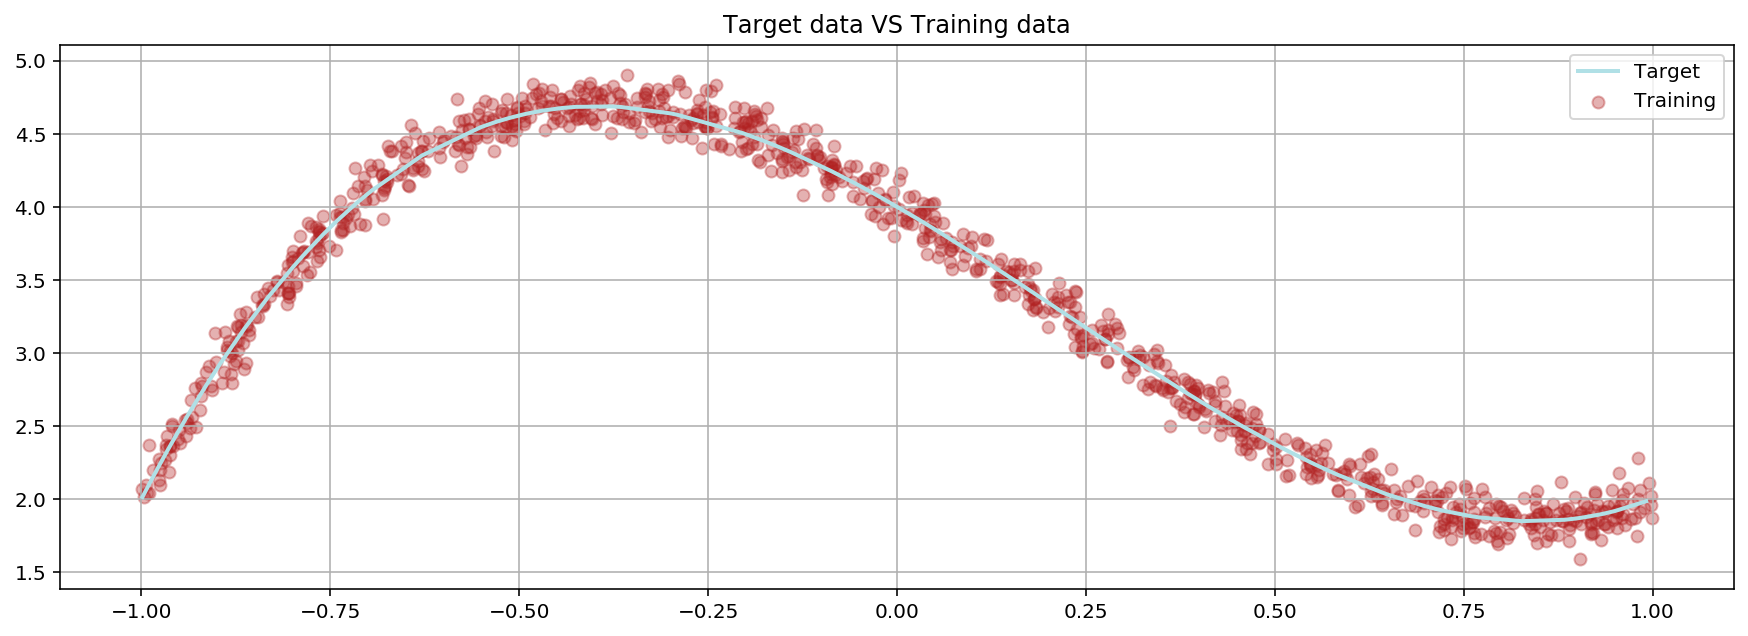

In [277]:
Ntrain = 1000
Nepochs = 50
sigma = 0.1
leftlim=-1.
rightlim=1.

np.random.seed(0)
x_train = np.random.uniform(leftlim, rightlim, Ntrain)
Nvalid = (int)(Ntrain/10)
x_valid = np.random.uniform(leftlim, rightlim, Nvalid)
x_valid.sort()
y_target = F_of(x_valid)

y_train = np.random.normal(F_of(x_train), sigma)
y_valid = np.random.normal(F_of(x_valid), sigma)

plt.figure(figsize=(15,5))
plt.title('Target data VS Training data')
plt.plot(x_valid, y_target, color='powderblue', label='Target', linewidth=2)
plt.scatter(x_train, y_train, color='firebrick', label='Training', alpha=0.35)
plt.legend()
plt.grid(True)
plt.show()

In [278]:
def Fit_With_Model(model): 
  
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=Nepochs,shuffle=True,
                        validation_data=(x_valid, y_valid), verbose=0)

    # look into training history
    # Plot training & validation loss values
    
    fig, axs = plt.subplots(1,2, figsize=(14,5))
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_title('Model loss')
    axs[0].set_ylabel('Loss')
    axs[0].set_xlabel('# Epochs')
    axs[0].legend(['Train', 'Test'], loc='best')
   
    
    x_predicted = np.linspace(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    axs[1].set_title('Predicted dataset')
    axs[1].set_xlabel('X')
    axs[1].set_ylabel('Y')
    axs[1].scatter(x_predicted, y_predicted,color='r', label='Predicted')
    axs[1].plot(x_valid, y_target, label='Target')
    axs[1].grid(True)
    axs[1].legend(fontsize='x-large')
    plt.show()
    
     # evaluate model with validation set AND exact values
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    score2 = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    print()
    print('Model evaluated through validation set:', "           ", 'Model evaluated through exact curve:')
    print('Test loss:', score[0], "                       ", 'Test loss:', score2[0])
    print('Test accuracy:', score[1], "                   ", 'Test accuracy:', score2[1])
    

### Rete #1: Deep Neural Network

Ho costruito una rete neurale contenente 4 layer nascosti, per un totale di 46 neuroni, con tutti i collegamenti possibili tra neuroni di layer consecutivi (rete densa). Ho utilizzato diverse funzioni di attivazione, provando a cambiarle e a invertire il loro ordine fino ad ottenere una combinazione che garantiva un risultato accettabile. Come si vede nei grafici successivi, il fit eseguito è di media qualità, la rete fatica a tracciare le zone della funzione con cambio di segno della derivata prima. Inoltre, il fit è imperfetto ai limiti del dominio. 

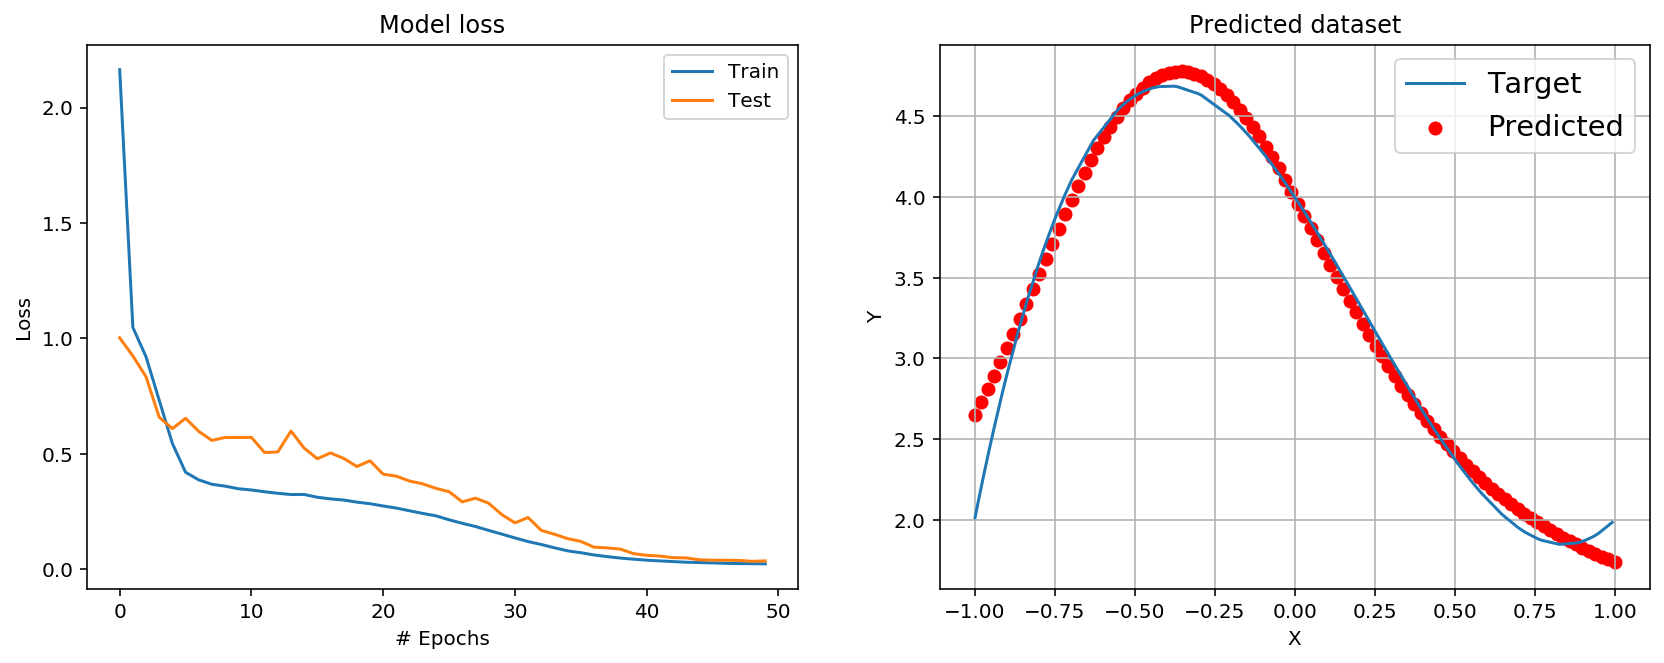


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.0364006906747818                         Test loss: 0.02834634855389595
Test accuracy: 0.0364006906747818                     Test accuracy: 0.02834634855389595


In [298]:
model = Sequential()
model.add(Dense(9, input_shape=(1,), activation='tanh'))
model.add(Dense(8, activation='swish'))
model.add(Dense(15, activation='softplus'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

Fit_With_Model(model)

### Rete #2: Wide Neural Network

Ho provato ad utilizzare una rete neurale con un solo layer nascosto, ma con lo stesso numero di neuroni del caso precedente (si chiama rete neurale *larga*). Come mi aspettavo, i risultati sono notevolmente peggiori ed il fit eseguito è pessimo. Le *loss* ottenute (stampate in output) sono di circa un ordine di grandezza maggiori risptto al caso precedente.

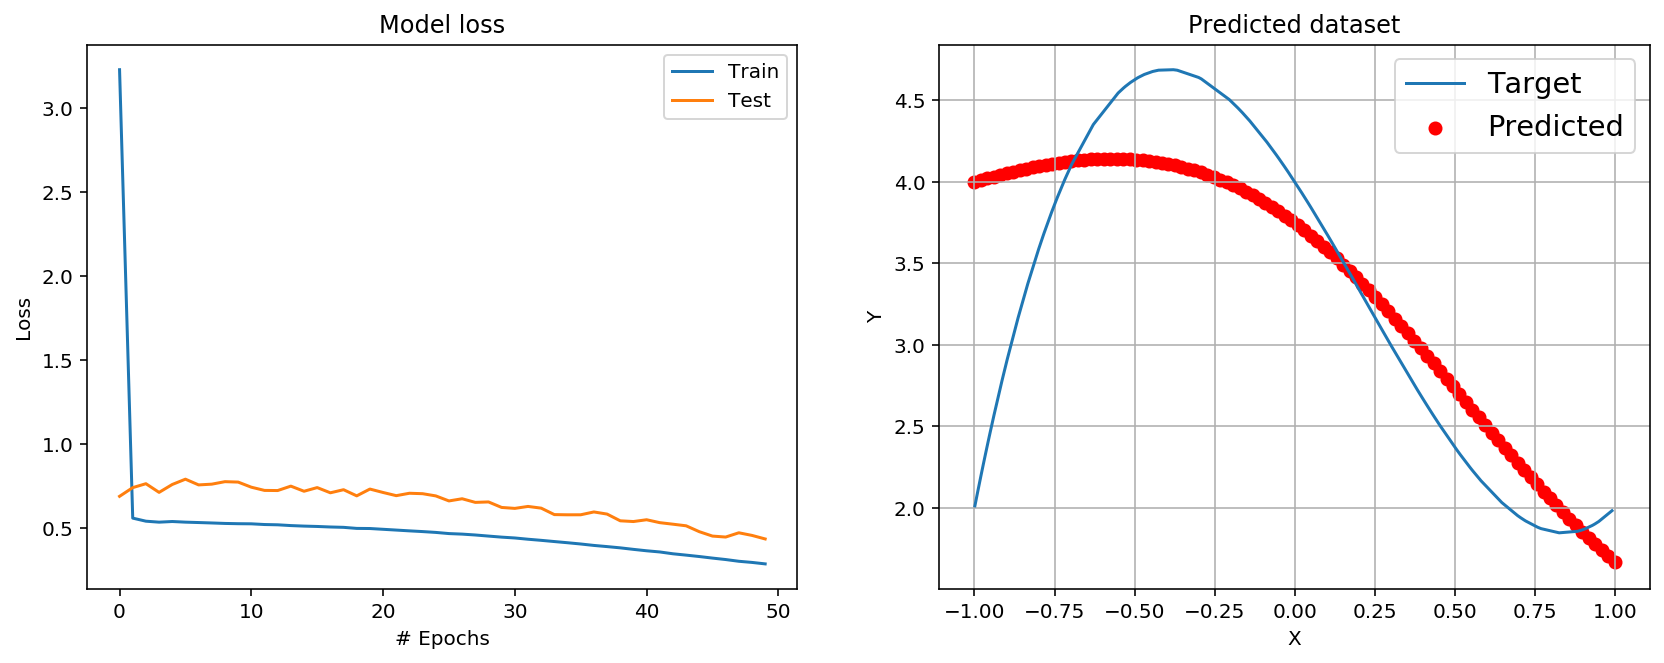


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.4325466454029083                         Test loss: 0.42220377922058105
Test accuracy: 0.4325466454029083                     Test accuracy: 0.42220377922058105


In [280]:
model = Sequential()
model.add(Dense(44, input_shape=(1,), activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

Fit_With_Model(model)

### Rete #3: Deep Neural Network with different optimizer

Ho provato qui a cambiare l'ottimizzatore, sostitutendo SGD (Stochastic Gradient Descent) con l'ottimizzatore Nadam (referenze [qui](http://cs229.stanford.edu/proj2015/054_report.pdf)) osservando un notevole miglioramento dei risultati. In particolare, il massimo centrale è fittato molto meglio e in generale i dati predetti sono più fedeli alla curva. COme prima, però, il fit peggiora quando ci. sia vvicina ai limiti del dominio (spiegheremo dopo il perché).

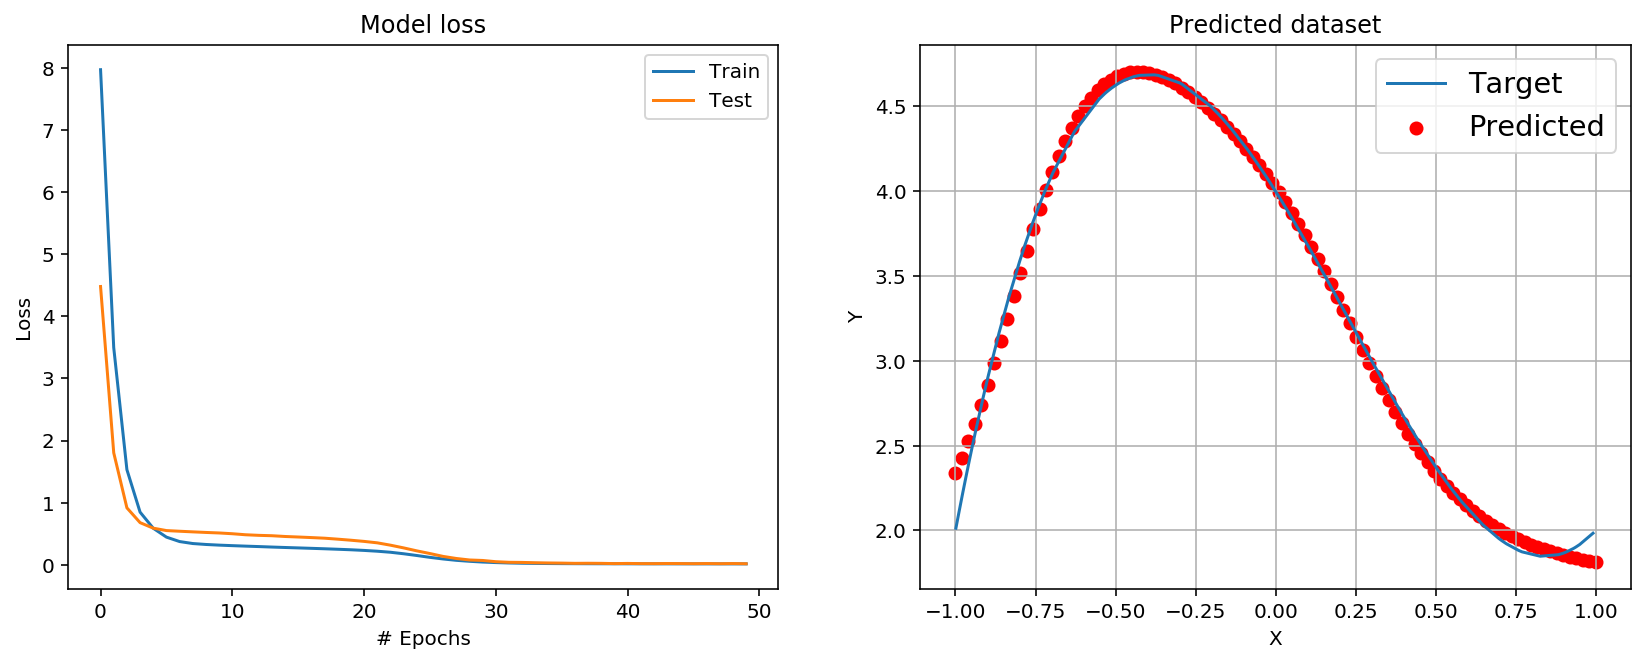


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.014872164465487003                         Test loss: 0.005715589039027691
Test accuracy: 0.014872164465487003                     Test accuracy: 0.005715589039027691


In [281]:
model = Sequential()
model.add(Dense(9, input_shape=(1,), activation='tanh'))
model.add(Dense(8, activation='swish'))
model.add(Dense(15, activation='softplus'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='Nadam', loss='mse', metrics=['mse'])

Fit_With_Model(model)

### Rete #4: Deep Neural Network (with MAE)

Ho mantenuto la solita architettura dei casi 1 e 3 (quattro layer nascosti per un totale di 46 neuroni). A differenza dei casi precedenti, però, ho cambiato la funzione di loss, scegliendo di usare la *Mean Absolute Error* che si definisce come 
$$ MAE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} |y_j^\mathrm{pred}-y_j|$$
I risultati sono gli stessi, quello che cambia è la stima dell'errore che però converge ugualmente a zero dopo circa 40 epoche.

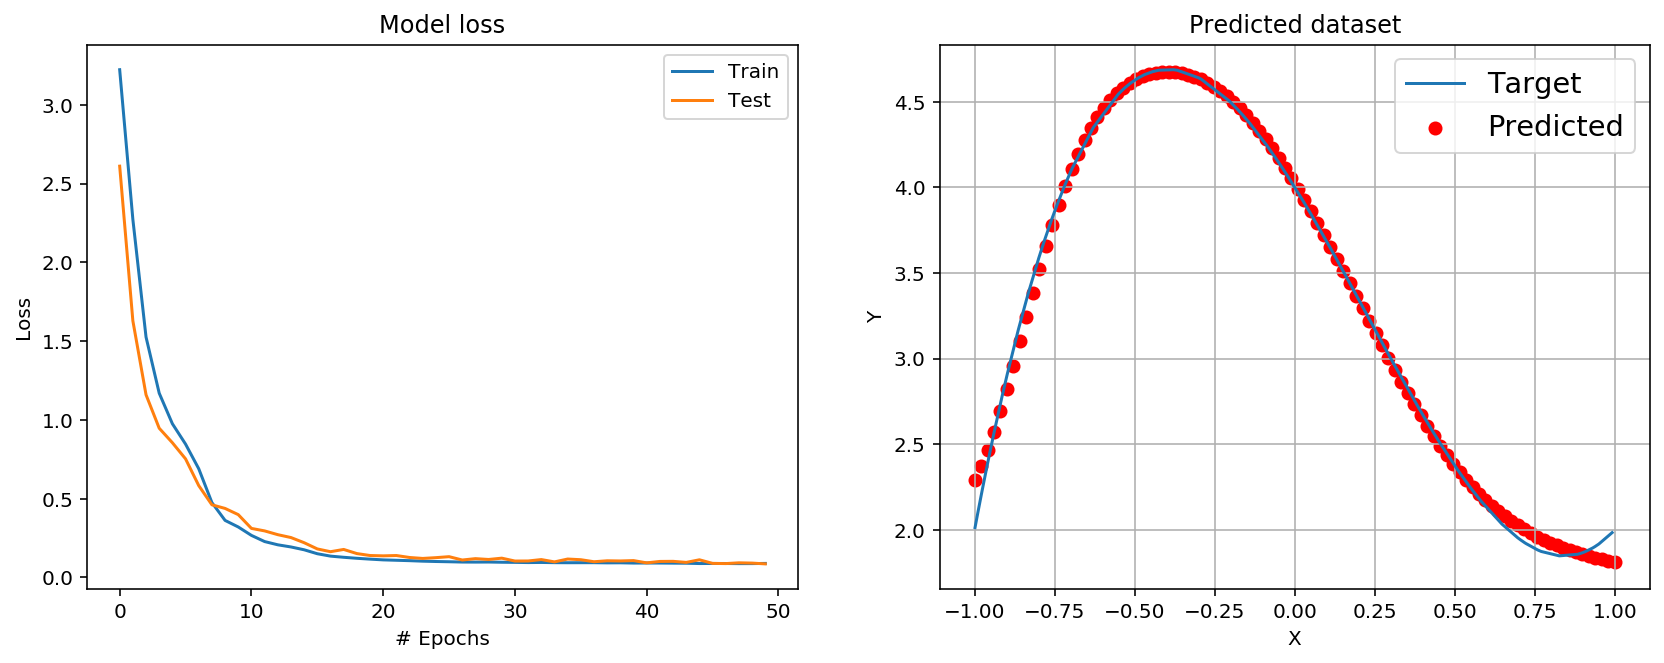


Model evaluated through validation set:             Model evaluated through exact curve:
Test loss: 0.08561789244413376                         Test loss: 0.03897335007786751
Test accuracy: 0.08561789244413376                     Test accuracy: 0.03897335007786751


In [282]:
model = Sequential()
model.add(Dense(9, input_shape=(1,), activation='tanh'))
model.add(Dense(8, activation='swish'))
model.add(Dense(15, activation='softplus'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='Nadam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
Fit_With_Model(model)

### Valutare le performance della rete fuori dal dominio

Si è infine valutato quali fossero le performance della rete quando interrogata sul predire dati al di fuori del range sulla quale era stata allenata. I risultati sono pessimi: del resto, la rete non acquisisce nessun tipo di informazione sulla forma analitica della funzione ma solo sul suo andamento in quello specifico intervallo, e dunque non può riprodurla al di fuori del dominio. 

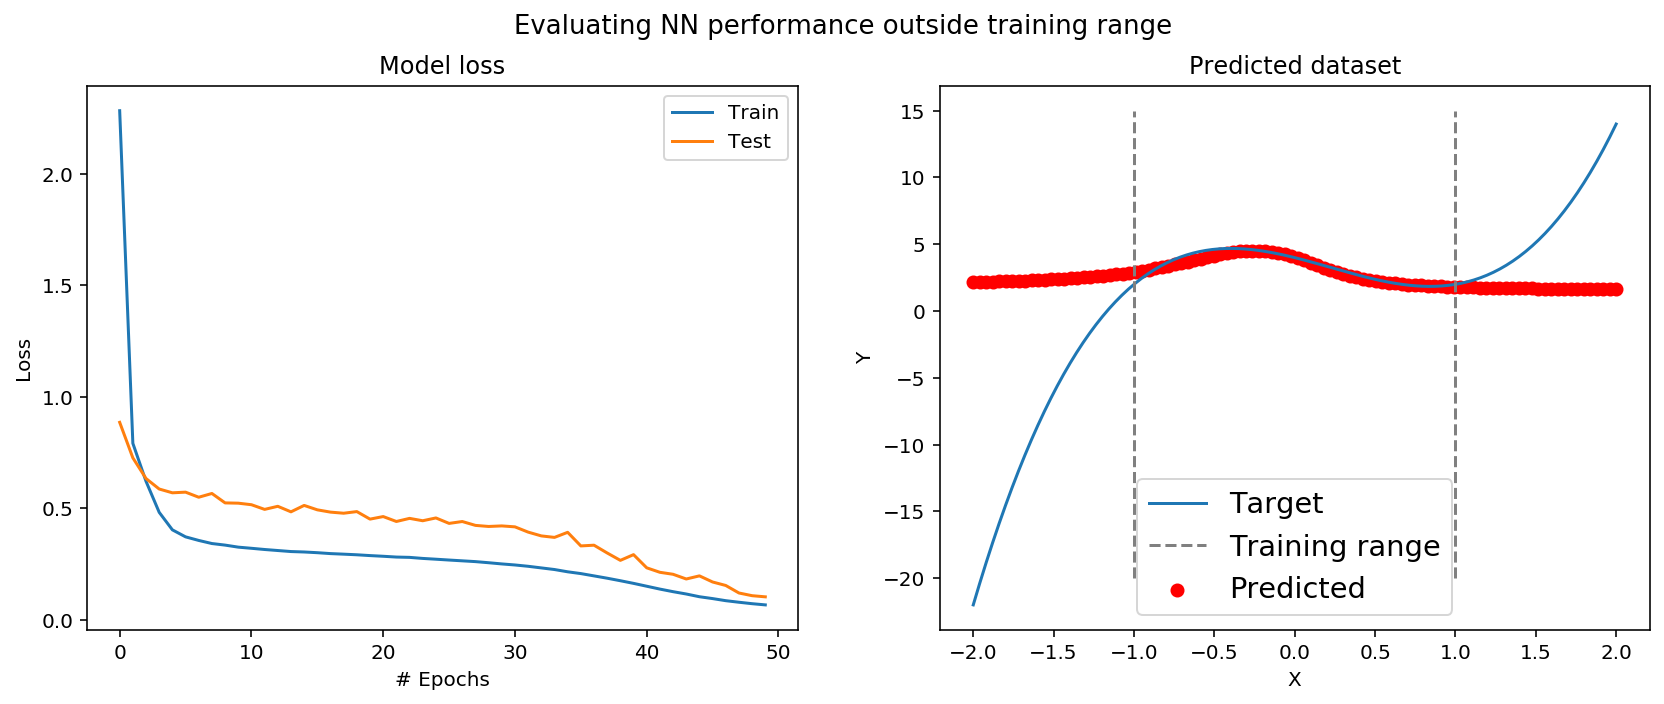


Model evaluated through validation set:               Model evaluated through exact curve:
Test loss: 0.10399482399225235                         Test loss: 0.09811270982027054
Test accuracy: 0.10399482399225235                     Test accuracy: 0.09811270982027054


In [283]:
model = Sequential()
model.add(Dense(9, input_shape=(1,), activation='tanh'))
model.add(Dense(8, activation='swish'))
model.add(Dense(15, activation='softplus'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=Nepochs,shuffle=True,
                        validation_data=(x_valid, y_valid), verbose=0)

# look into training history
# Plot training & validation loss values
    
fig, axs = plt.subplots(1,2, figsize=(14,5))
plt.suptitle("Evaluating NN performance outside training range",fontsize=13)
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Model loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('# Epochs')
axs[0].legend(['Train', 'Test'], loc='best')
   
xx=np.linspace(-2,2,200)
yy=F_of(xx)
    
x_predicted = np.linspace(-2, 2, 100)
y_predicted = model.predict(x_predicted)
axs[1].set_title('Predicted dataset')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].scatter(x_predicted, y_predicted,color='r', label='Predicted')
axs[1].plot(xx, yy, label='Target')
axs[1].plot([-1,-1],[-20,15], linestyle='dashed',c='grey', label='Training range')
axs[1].plot([1,1],[-20,15], linestyle='dashed',c='grey')
#axs[1].grid(True)
axs[1].legend(fontsize='x-large')
plt.show()
    
# evaluate model with validation set AND exact values
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score2 = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print()
print('Model evaluated through validation set:', "           ", '  Model evaluated through exact curve:')
print('Test loss:', score[0], "                       ", 'Test loss:', score2[0])
print('Test accuracy:', score[1], "                   ", 'Test accuracy:', score2[1])
    

## Esercizio 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ho implementato una Deep Neural Network che fosse in grado di fittare una funzione trigonometrica a due variabili come quella richiesta. La procedura di costruzione della rete è uguale a quella per le funzioni monodimensionali. Dati i risultati con le reti precedenti, ho scelto di utilizzare quattro layer nascosti densi con un totale di 65 neuroni, con ottimizzatore Nadam e loss MSE. L'unica differenza è stata che nel layer di input sono presenti due neuroni (alla rete è stata passata una matrice di dimensioni 2xN). I parametri utilizzati sono:
- $N_{train} = 3000$
- $N_{valid} = 300$
- $N_{epochs} = 50$
- $\sigma = 0.1$

Dopo aver allenato e validato la rete, si è proceduto a verificare le sue capacità predittive e i risultati sono ottimi: si veda il grafico in cui vengono sovrapposti i dati predetti dalla rete con dei punti appartenenti alla curva esatta. Anche le zone con raggio di curvatura più basso vengono riprodotte bene dalla rete.

In [299]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
def F2D(x):
    return np.sin(x[:,0]**2 + x[:,1]**2)

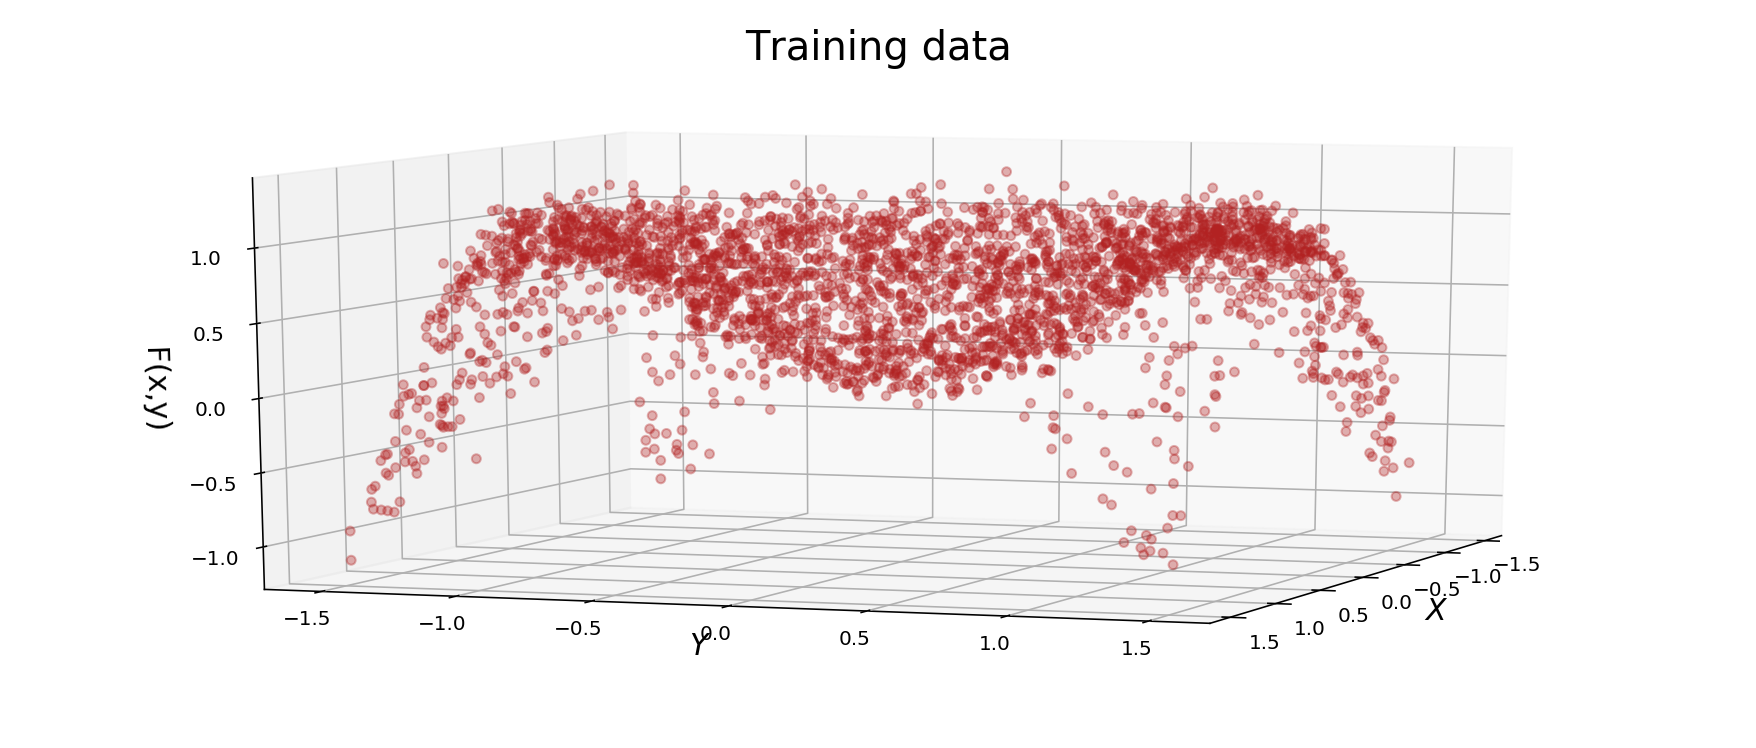

In [300]:
Ntrain = 3000
Nepochs = 50
sigma = 0.1
leftlim=-1.5
rightlim=1.5

np.random.seed(2)
xy_train = np.random.uniform(leftlim, rightlim, (Ntrain,2))
Nvalid = (int)(Ntrain/10)
xy_valid = np.random.uniform(leftlim, rightlim, (Nvalid,2))

z_target = F2D(xy_train)
z_train = np.random.normal(F2D(xy_train), sigma)
z_valid = np.random.normal(F2D(xy_valid), sigma)

fig = plt.figure(figsize=(12,5))
ax = Axes3D(fig)
ax.set_title("Training data", fontsize=20)
ax.scatter(xy_train[:,0], xy_train[:,1], z_train, color='firebrick', label='Training', alpha=0.35)
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)
ax.set_zlabel('F(x,y)', fontsize=15)
ax.view_init(10,20)
plt.show()

In [301]:
model = Sequential()
model.add(Dense(20, input_shape=(2,), activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(15, activation='softplus'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='Nadam', loss='mse', metrics=['mse'])

history = model.fit(x=xy_train, y=z_train, batch_size=32, epochs=Nepochs,shuffle=True,
                        validation_data=(xy_valid, z_valid), verbose=0)


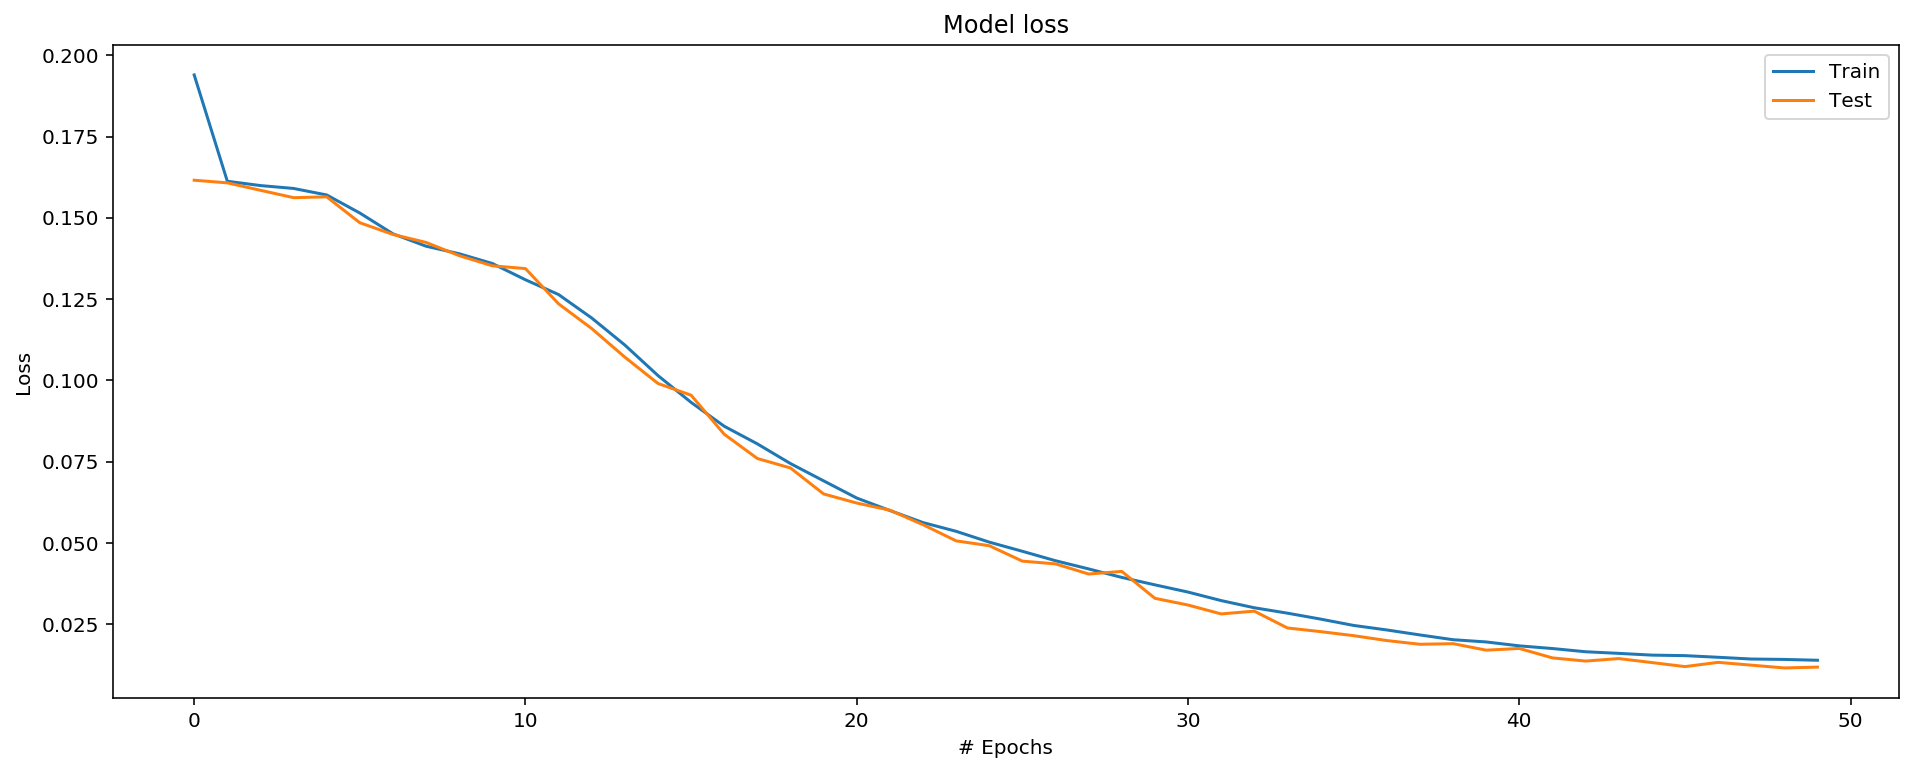


Model evaluated through validation set:              Model evaluated through exact curve:
Test loss: 0.011790141463279724                         Test loss: 0.0038399503100663424
Test accuracy: 0.011790141463279724                     Test accuracy: 0.0038399503100663424


In [302]:
plt.figure(figsize=(16,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('# Epochs')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
# evaluate model with validation set AND exact values
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=0)
score2 = model.evaluate(xy_train, z_target, batch_size=32, verbose=0)
print()
print('Model evaluated through validation set:', "           ", ' Model evaluated through exact curve:')
print('Test loss:', score[0], "                       ", 'Test loss:', score2[0])
print('Test accuracy:', score[1], "                   ", 'Test accuracy:', score2[1])

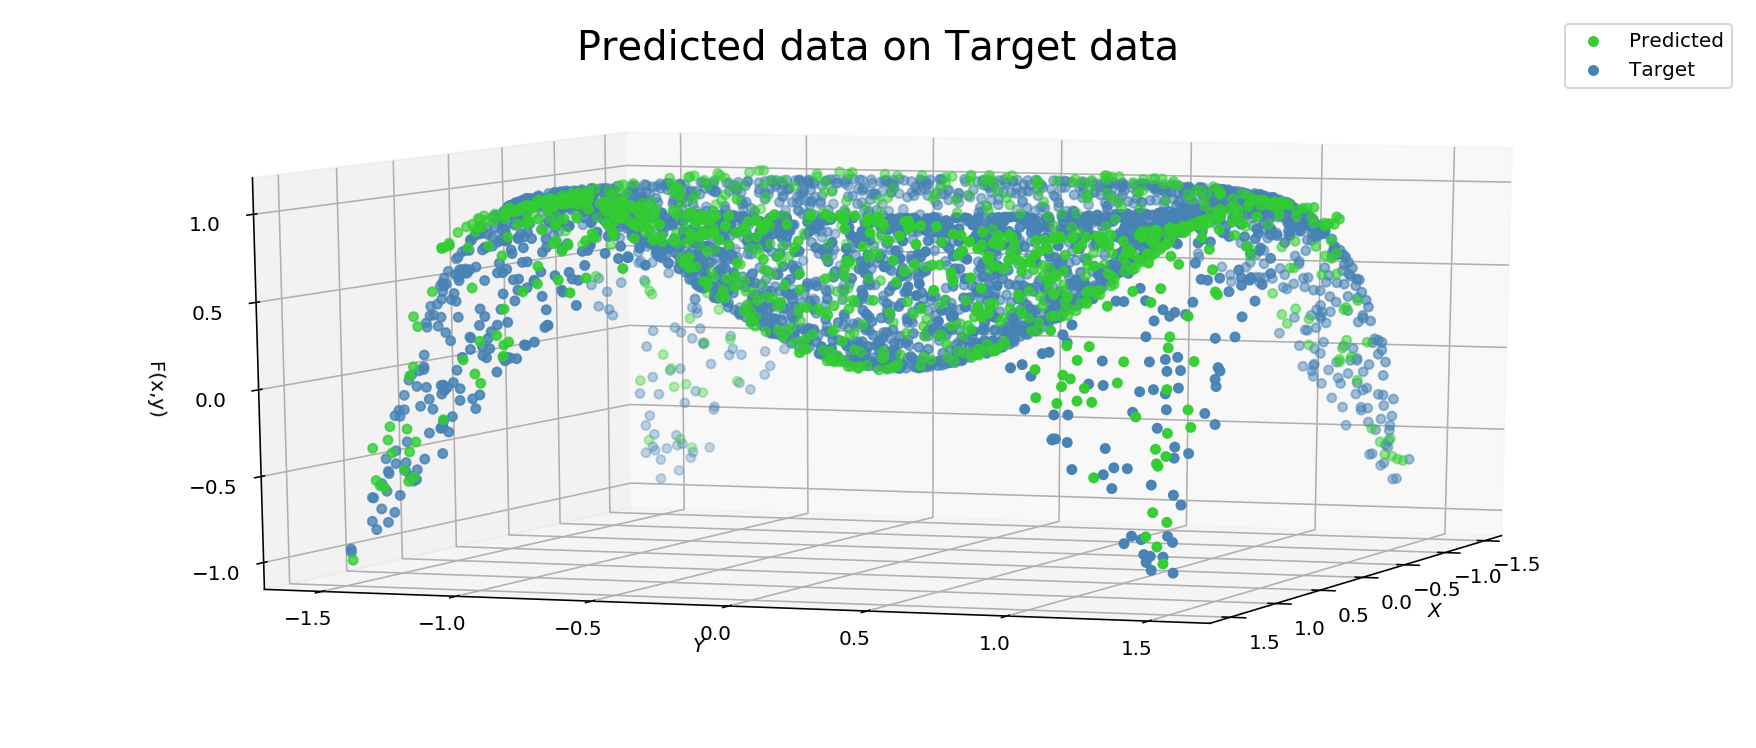

In [303]:
xy_predicted = np.random.uniform(leftlim, rightlim, (1000,2))
z_predicted = model.predict(xy_predicted)

fig = plt.figure(figsize=(12,5))
ax = Axes3D(fig)
ax.set_title("Predicted data on Target data", fontsize=20)
ax.scatter(xy_predicted[:,0], xy_predicted[:,1], z_predicted, c='limegreen',label='Predicted')
ax.scatter(xy_train[:,0], xy_train[:,1], z_target, label='Target',c='steelblue')
ax.legend()
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('F(x,y)')
ax.view_init(10,20)
plt.show()
    